# CREDIT EDA ANALYSIS

### <p style=color:blue>NALINI RANJAN, BATCH NO. DS-49, EMAIL-naliniranjan@yahoo.com

### Problem Sattement-

This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Business Understanding-

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

 <h1> 1- Familiarising with the Application Data and Cleaning as required

 <h3 style=color:black>Importing required Libraries filtering warnings and setting display limit


In [1]:
#Importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",15)
pd.set_option("display.max_columns",15)

 <h3 style=color:black>Loading and Reading Data

In [2]:
#Loading the data and checking head
bank=pd.read_csv('application_data.csv')
bank.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  ...  FLAG_DOCUMENT_21  \
0               Y             0  ...                 0   
1               N             0  ...                 0   
2               Y             0  ...                 0   
3               Y             0  ...                 0   
4               Y             0  ...                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         NaN                       NaN   
4                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  
0                       0.0                        1.0  
1                       0.0                        0.0  
2                       0.0                        0.0  
3                       NaN                        NaN  
4                       0.0                        0.0  

[5 rows x 122 columns]

 <h3 style=color:black> Printing the intial information of the data

In [3]:
print ("No. of Rows     : " , bank.shape[0])
print ("No. of Column  : " , bank.shape[1])
print('*'*50)
print ("\nColumn's name: \n" ,bank.columns.tolist())
print('*'*50)
print ("\n Total Missing values :  ", bank.isnull().sum().values.sum())
print('*'*50)
print ("\nUnique values :  \n", bank.nunique())

No. of Rows     :  307511
No. of Column  :  122
**************************************************

Column's name: 
 ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOUR

<p> Observation-Intial data has 122 column and 307511 row , unique values and list of column can be reffered from above. There are many missing values in total. We will deal with the missing values seperately.

 <h2> 2-Handling incorrect Data Types

<p> * Note- if there is incorrect data in the column Panda treat is as "object" type of the column so instead of printing all the column I will print here column which are object type and check if these are present in correct format type. First we will deal with these column then will see others as well.

In [4]:
# data info of the object column
bank.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307511 non-null  object
 1   CODE_GENDER                 307511 non-null  object
 2   FLAG_OWN_CAR                307511 non-null  object
 3   FLAG_OWN_REALTY             307511 non-null  object
 4   NAME_TYPE_SUITE             306219 non-null  object
 5   NAME_INCOME_TYPE            307511 non-null  object
 6   NAME_EDUCATION_TYPE         307511 non-null  object
 7   NAME_FAMILY_STATUS          307511 non-null  object
 8   NAME_HOUSING_TYPE           307511 non-null  object
 9   OCCUPATION_TYPE             211120 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 11  ORGANIZATION_TYPE           307511 non-null  object
 12  FONDKAPREMONT_MODE          97216 non-null   object
 13  HOUSETYPE_MODE              1

In [5]:
# data.head
bank.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  ...  FLAG_DOCUMENT_21  \
0               Y             0  ...                 0   
1               N             0  ...                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                       0.0   
1                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  
0                       0.0                        1.0  
1                       0.0                        0.0  

[2 rows x 122 columns]

 <p> Observation- Above 15 columns are checked and seems to found correct data types so there is no alteration required-But we may require to change data type to numerical type for easy computation using map of apply function. 

## Checking Dupticate value

In [6]:
bank.duplicated().sum()

0

 <p> Its good that There are no duplicated value present in the data.

 <h2> 3-Missing value treatment

<p> * Note- We will check the missing value in the percentage form and put into the dataframe so that easily identified. for the will create two dataframe and concat it.

In [7]:
# creating new dataframe missing _50
is_null= pd.DataFrame(bank.isnull().sum()).rename(columns={0:'missing values'}).reset_index()
missing_percent=pd.DataFrame(bank.isnull().mean()*100).rename(columns={0:'missing percent'}).reset_index()

missing_info=is_null.merge(missing_percent)

 <p> * Note-Since we have many features so we are safe to drop column having missing value more than 50 percent

In [8]:
missing_50=missing_info[missing_info['missing percent']>50].sort_values('missing percent',ascending=False)

In [9]:
# Printing missing value
print('total missing value column:',len(missing_50))
missing_50

total missing value column: 41


index  missing values  missing percent
48            COMMONAREA_AVG          214865        69.872297
76           COMMONAREA_MEDI          214865        69.872297
62           COMMONAREA_MODE          214865        69.872297
84  NONLIVINGAPARTMENTS_MEDI          213514        69.432963
56   NONLIVINGAPARTMENTS_AVG          213514        69.432963
..                       ...             ...              ...
78            ENTRANCES_MEDI          154828        50.348768
83           LIVINGAREA_MEDI          154350        50.193326
55            LIVINGAREA_AVG          154350        50.193326
69           LIVINGAREA_MODE          154350        50.193326
87            HOUSETYPE_MODE          154297        50.176091

[41 rows x 3 columns]

In [10]:
missing_50=missing_50.set_index('index')

#####  Observation- Since there are neumerous Features are present and these are good enough to conclude the results againts the target variable  and there are 41 column which has missing values more than 50 percent so after dropping the column we still remain with the 81 features in our data. So instead of predicting the value we will drop these column

#### <p> Dropping 41 column having missing value more than 50 pecent

In [11]:
dropcols=missing_50.index
dropcols

Index(['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MODE', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'FLOORSMIN_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MEDI', 'OWN_CAR_AGE', 'LANDAREA_AVG', 'LANDAREA_MEDI',
       'LANDAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'ELEVATORS_MODE',
       'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'APARTMENTS_AVG',
       'ENTRANCES_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'LIVINGAREA_MEDI',
       'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'HOUSETYPE_MODE'],
      dtype='object', name='index')

In [12]:
#drop 41 columns
bank.drop(dropcols,axis=1,inplace=True)

In [13]:
#rechecking the bank data shape
bank.shape

(307511, 81)

<p> Observation-After dropping the columns having missing values more than 50 percent 
    our new dataframe has row-307511, column-81

In [14]:
#Check the missing value of the remaining column
is_null1= pd.DataFrame(bank.isnull().sum()).rename(columns={0:'missing values'})

is_null1=is_null1[is_null1['missing values']>0].sort_values('missing values')

In [15]:
print(len(is_null1))
is_null1

26


missing values
DAYS_LAST_PHONE_CHANGE                     1
CNT_FAM_MEMBERS                            2
AMT_ANNUITY                               12
AMT_GOODS_PRICE                          278
EXT_SOURCE_2                             660
...                                      ...
YEARS_BEGINEXPLUATATION_MODE          150007
YEARS_BEGINEXPLUATATION_AVG           150007
FLOORSMAX_MODE                        153020
FLOORSMAX_AVG                         153020
FLOORSMAX_MEDI                        153020

[26 rows x 1 columns]

#####  Note- I will seprate two columns from the Isnull1 dataframe index that is numerical column and categorical column, I will fill missing value but here we will create new dataframe from the original dataframe because for EDA purpose we do not require to compute missing values and incase our EDA require more indepth insights then we may again start work on the previous dataframe bank.

In [16]:
# column datatype object
cat_col=[cols for cols in bank.select_dtypes(include='object') if cols in is_null1.index]

In [17]:
print(cat_col)
print(len(cat_col))

['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE']
3


In [18]:
# column datatype not as oject or we can say numerical
num_col= [cols for cols in bank.select_dtypes(exclude='object') if cols in is_null1.index]

In [19]:
print(num_col)
len(num_col)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


23

<p> Observation- from the len function we can see that null column has been segregared into the two column and in numerical column 3 and in categorical column 23 columns are there

#### * Note Now we will fill all the missing value But before that we will check mean median and unique value which will give us good idea what to fill in the numerical column. For categorical column we will fill the mode.

In [20]:
#Unique median and mode before filling the column
for i in num_col:
    print(i)
    print('unique_value',bank[i].nunique())
    print('median',bank[i].median())
    print('mean',bank[i].mean())
    print('*'*50)

AMT_ANNUITY
unique_value 13672
median 24903.0
mean 27108.573909183444
**************************************************
AMT_GOODS_PRICE
unique_value 1002
median 450000.0
mean 538396.2074288895
**************************************************
CNT_FAM_MEMBERS
unique_value 17
median 2.0
mean 2.152665450442101
**************************************************
EXT_SOURCE_2
unique_value 119831
median 0.5659614260608526
mean 0.5143926741308463
**************************************************
EXT_SOURCE_3
unique_value 814
median 0.5352762504724826
mean 0.5108529061800121
**************************************************
YEARS_BEGINEXPLUATATION_AVG
unique_value 285
median 0.9816
mean 0.9777348581622732
**************************************************
FLOORSMAX_AVG
unique_value 403
median 0.1667
mean 0.2262819070368362
**************************************************
YEARS_BEGINEXPLUATATION_MODE
unique_value 221
median 0.9816
mean 0.9770653729428284
***********************************

<p> Observation- We are good to fill the median value in the missing numerical column

<h>* Note- Now we will create new dataframe bank_notnull also we will fill all the missing value by creating a function

In [21]:
bank['EMERGENCYSTATE_MODE'].mode()[0]

'No'

<h2>Creating new dataframe bank_notnull because will do changes in this dataset..

In [22]:
bank_notnull=bank.copy()

In [23]:
bank_notnull['EMERGENCYSTATE_MODE'].mode()[0]

'No'

In [24]:
bank_notnull['EMERGENCYSTATE_MODE'].unique()

array(['No', nan, 'Yes'], dtype=object)

<h1> 4-Filling missing value with mode and median

In [25]:
#creating function for filling missing values
def fill_na(data, col1=num_col, col2=cat_col):
        for i in col1:
            data[i].fillna(data[i].median(),inplace=True)
        for j in col2:
            data[j].fillna(data[j].mode()[0],inplace=True)

In [26]:
# call the above function and fill all the missing value
fill_na(bank_notnull)

In [27]:
bank_notnull['EMERGENCYSTATE_MODE'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
bank_notnull.isnull().sum().sum()

0

In [29]:
bank_notnull.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  ...  FLAG_DOCUMENT_21  \
0               Y             0  ...                 0   
1               N             0  ...                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                       0.0   
1                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  
0                       0.0                        1.0  
1                       0.0                        0.0  

[2 rows x 81 columns]

<h1>5- Sanity Check

<h4>  Note- Now we will deal with the other incorrect data type present in the  numerical and categorical column which is not appropriate and  can create problem in our data analysis

<h4> Note- For incorrect data in the numerical column we will try to catch from the describe method and object column we will try to catch from the unique values method

In [30]:
# describe of first 20 column
bank_notnull.describe().T[0:20]

count           mean            std       min  \
SK_ID_CURR            307511.0  278180.518577  102790.175348  100002.0   
TARGET                307511.0       0.080729       0.272419       0.0   
CNT_CHILDREN          307511.0       0.417052       0.722121       0.0   
AMT_INCOME_TOTAL      307511.0  168797.919297  237123.146279   25650.0   
AMT_CREDIT            307511.0  599025.999706  402490.776996   45000.0   
...                        ...            ...            ...       ...   
FLAG_CONT_MOBILE      307511.0       0.998133       0.043164       0.0   
FLAG_PHONE            307511.0       0.281066       0.449521       0.0   
FLAG_EMAIL            307511.0       0.056720       0.231307       0.0   
CNT_FAM_MEMBERS       307511.0       2.152664       0.910679       1.0   
REGION_RATING_CLIENT  307511.0       2.052463       0.509034       1.0   

                           25%       50%       75%          max  
SK_ID_CURR            189145.5  278202.0  367142.5     456255.0  
TARGET                     0.0       0.0       0.0          1.0  
CNT_CHILDREN               0.0       0.0       1.0         19.0  
AMT_INCOME_TOTAL      112500.0  147150.0  202500.0  117000000.0  
AMT_CREDIT            270000.0  513531.0  808650.0    4050000.0  
...                        ...       ...       ...          ...  
FLAG_CONT_MOBILE           1.0       1.0       1.0          1.0  
FLAG_PHONE                 0.0       0.0       1.0          1.0  
FLAG_EMAIL                 0.0       0.0       0.0          1.0  
CNT_FAM_MEMBERS            2.0       2.0       3.0         20.0  
REGION_RATING_CLIENT       2.0       2.0       2.0          3.0  

[20 rows x 8 columns]

In [31]:
bank_notnull.describe().T[20:]

count       mean       std  min   25%   50%  \
REGION_RATING_CLIENT_W_CITY  307511.0   2.031521  0.502737  1.0   2.0   2.0   
HOUR_APPR_PROCESS_START      307511.0  12.063419  3.265832  0.0  10.0  12.0   
REG_REGION_NOT_LIVE_REGION   307511.0   0.015144  0.122126  0.0   0.0   0.0   
REG_REGION_NOT_WORK_REGION   307511.0   0.050769  0.219526  0.0   0.0   0.0   
LIVE_REGION_NOT_WORK_REGION  307511.0   0.040659  0.197499  0.0   0.0   0.0   
...                               ...        ...       ...  ...   ...   ...   
AMT_REQ_CREDIT_BUREAU_DAY    307511.0   0.006055  0.103037  0.0   0.0   0.0   
AMT_REQ_CREDIT_BUREAU_WEEK   307511.0   0.029723  0.190728  0.0   0.0   0.0   
AMT_REQ_CREDIT_BUREAU_MON    307511.0   0.231293  0.856810  0.0   0.0   0.0   
AMT_REQ_CREDIT_BUREAU_QRT    307511.0   0.229631  0.744059  0.0   0.0   0.0   
AMT_REQ_CREDIT_BUREAU_YEAR   307511.0   1.778463  1.765523  0.0   1.0   1.0   

                              75%    max  
REGION_RATING_CLIENT_W_CITY   2.0    3.0  
HOUR_APPR_PROCESS_START      14.0   23.0  
REG_REGION_NOT_LIVE_REGION    0.0    1.0  
REG_REGION_NOT_WORK_REGION    0.0    1.0  
LIVE_REGION_NOT_WORK_REGION   0.0    1.0  
...                           ...    ...  
AMT_REQ_CREDIT_BUREAU_DAY     0.0    9.0  
AMT_REQ_CREDIT_BUREAU_WEEK    0.0    8.0  
AMT_REQ_CREDIT_BUREAU_MON     0.0   27.0  
AMT_REQ_CREDIT_BUREAU_QRT     0.0  261.0  
AMT_REQ_CREDIT_BUREAU_YEAR    3.0   25.0  

[48 rows x 8 columns]

<h5>Observation- from above we come to know that days columns has the negative value we will extract this column and convert in positive value

In [32]:
#list of days column having negative value
incorret_cols=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

In [33]:
#creating new column days to year
def clean_col(data,cols):
    for i in cols:
        data[i.replace('DAYS','YEAR')]=data[i].apply(lambda x: round((abs(x)/365),1))
        

In [34]:
#droppin days column
clean_col(bank_notnull,incorret_cols)

In [35]:
bank_notnull.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  ...  AMT_REQ_CREDIT_BUREAU_QRT  \
0               Y             0  ...                        0.0   
1               N             0  ...                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  YEAR_BIRTH  YEAR_EMPLOYED YEAR_REGISTRATION  \
0                         1.0        25.9            1.7              10.0   
1                         0.0        45.9            3.3               3.2   

  YEAR_ID_PUBLISH YEAR_LAST_PHONE_CHANGE  
0             5.8                    3.1  
1             0.8                    2.3  

[2 rows x 86 columns]

In [36]:
bank_notnull.shape

(307511, 86)

In [37]:
bank_notnull.drop(incorret_cols,axis=1,inplace=True)

In [38]:
bank_notnull.shape

(307511, 81)

In [39]:
cat_cols=(bank_notnull.select_dtypes(include='object')).columns

<h5> Note-We will check all the categorical column if there are any inappropriate value in it,  for that we will see the unique value in the column.

In [40]:
cat_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [41]:
#Printing all the unique value of the categorical column
for i in cat_cols:
    print(i)
    print(bank_notnull[i].unique())
    print('*'*50)

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
**************************************************
CODE_GENDER
['M' 'F' 'XNA']
**************************************************
FLAG_OWN_CAR
['N' 'Y']
**************************************************
FLAG_OWN_REALTY
['Y' 'N']
**************************************************
NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
**************************************************
NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
**************************************************
NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
**************************************************
NAME_FAMILY_STATUS
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
***********************************

<h5>There are two column Code_gender  and organization type which have incorrect value type 'XNA this is same like NAN so will replace it with the mode of the column'**

In [42]:
bank_notnull['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
                          ...  
Religion                     85
Industry: type 13            67
Trade: type 4                64
Trade: type 5                49
Industry: type 8             24
Name: ORGANIZATION_TYPE, Length: 58, dtype: int64

In [43]:
#finding mode value of the CODE_GENDER,CODE_GENDER 
code_gender_mode=bank_notnull['CODE_GENDER'].mode()[0]
ORGANIZATION_TYPE_mode=bank_notnull['ORGANIZATION_TYPE'].mode()[0]

In [44]:
#filling missing value  of the CODE_GENDER,CODE_GENDER with the mode
bank_notnull['CODE_GENDER']=np.where(bank_notnull['CODE_GENDER']=='XNA',code_gender_mode,bank_notnull['CODE_GENDER'])
bank_notnull['ORGANIZATION_TYPE']=np.where(bank_notnull['ORGANIZATION_TYPE']=='XNA',ORGANIZATION_TYPE_mode,bank_notnull['ORGANIZATION_TYPE'])

In [45]:
#verifying CODE_GENDER values
bank_notnull['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [46]:
#verifying ORGANIZATION_TYPE values
bank_notnull['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'Electricity', 'Medicine', 'Business Entity Type 2',
       'Self-employed', 'Transport: type 2', 'Construction', 'Housing',
       'Kindergarten', 'Trade: type 7', 'Industry: type 11', 'Military',
       'Services', 'Security Ministries', 'Transport: type 4',
       'Industry: type 1', 'Emergency', 'Security', 'Trade: type 2',
       'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'Industry

In [47]:
bank_notnull['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    123366
Self-employed              38412
Other                      16683
Medicine                   11193
Business Entity Type 2     10553
                           ...  
Religion                      85
Industry: type 13             67
Trade: type 4                 64
Trade: type 5                 49
Industry: type 8              24
Name: ORGANIZATION_TYPE, Length: 57, dtype: int64

In [48]:
# dataframe shape
bank_notnull.shape

(307511, 81)

In [49]:
#creating new dataframe bank_cleaned from bank_notnull 
bank_cleaned=bank_notnull.copy()

<h1>6-Prepration for EDA

In [50]:
#checking dataframe head
bank_cleaned.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  ...  AMT_REQ_CREDIT_BUREAU_QRT  \
0               Y             0  ...                        0.0   
1               N             0  ...                        0.0   
2               Y             0  ...                        0.0   
3               Y             0  ...                        0.0   
4               Y             0  ...                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  YEAR_BIRTH  YEAR_EMPLOYED YEAR_REGISTRATION  \
0                         1.0        25.9            1.7              10.0   
1                         0.0        45.9            3.3               3.2   
2                         0.0        52.2            0.6              11.7   
3                         1.0        52.1            8.3              26.9   
4                         0.0        54.6            8.3              11.8   

  YEAR_ID_PUBLISH YEAR_LAST_PHONE_CHANGE  
0             5.8                    3.1  
1             0.8                    2.3  
2             6.9                    2.2  
3             6.7                    1.7  
4             9.5                    3.0  

[5 rows x 81 columns]

In [51]:
#percentage value of 0 and 1 in target column
bank_cleaned.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

<h4>Observation- We have highly imbalanced dataset appx 92 percent indicating that loan should  be provided and only 8 percent data indicating that loan should not be provided as they are having difficulty in paying loan.
Here we have to be very careful because if we incorrectly predict 1 bank will be in heavy loss and if we incorrectly predict 0 then bank will be in some kind of loss means loosing the interest.
But at the same time we have to give good and correctful insight of 0 and 1 to run smooth business.**

<h4>👉👉In simple word we can say we have to increase 92% and decrease 8% part

<h5>👉👉 Note-At this stage we have 3 dataset in hand 1. bank, 2.bank_notnull and 3. bank_cleaned Since we have imputed many missing values so we have to remember all the columns which were having high missing value we have to keep this also in account and verify in the multiple way

<h5>👉👉 Note-From This stage we will work on the bank_cleaned dataset, all the required changes from here will be done in this dataset
but this is not the last dataset we will create more as we required but we will keep our previous two dataset(bank and bank_notnull) intact.

<h5>👉👉 Note- In  EDA whatever we will visualise or numerically derive we will markdown as observation remember this is not the final conclussion.  For final summarize conclussion refer at the end

In [52]:
# Dividing columns in two categeory
cat_column=bank_cleaned.select_dtypes(include='object').columns
num_column=bank_cleaned.select_dtypes(exclude='object').columns

<h5> Note- From the bar plot we will compare for categorical column what are the different values are present in our data**

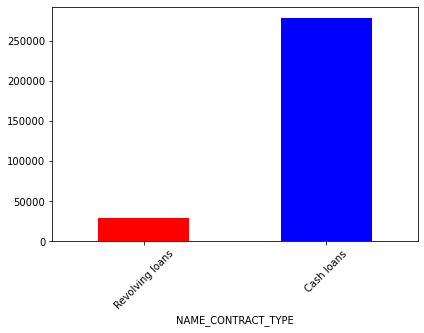

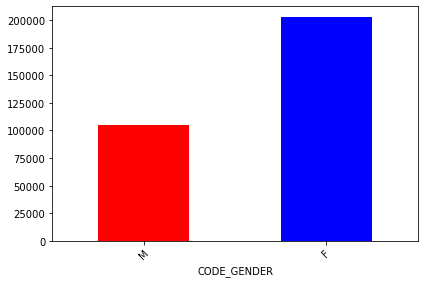

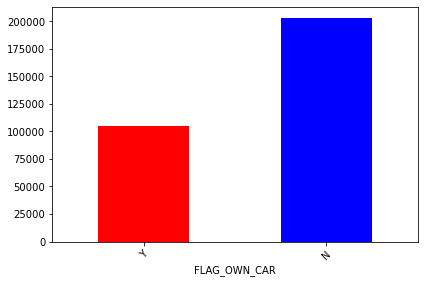

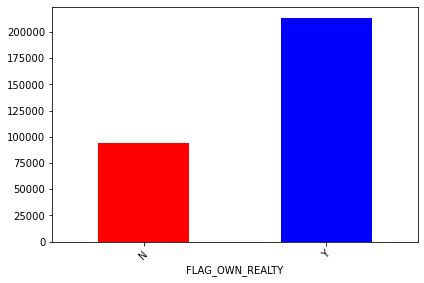

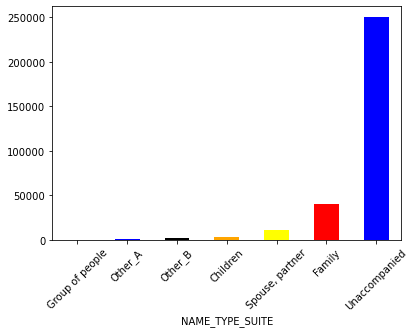

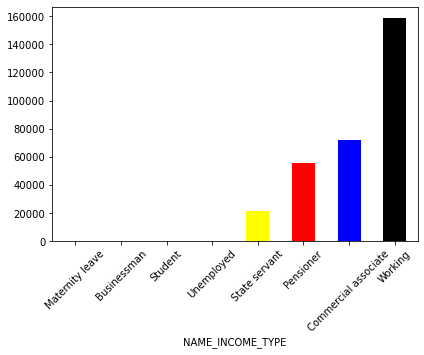

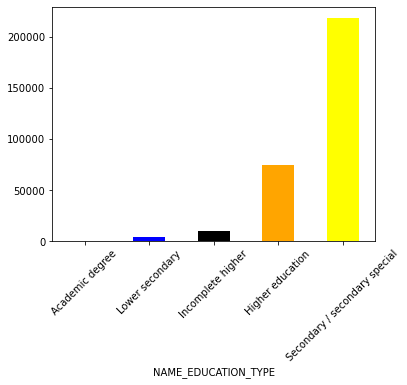

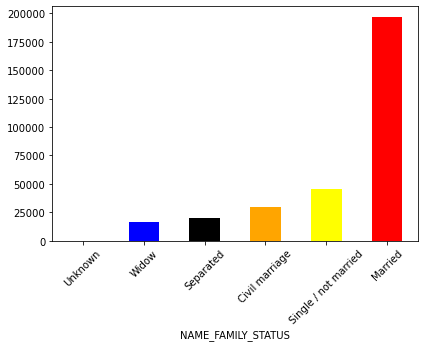

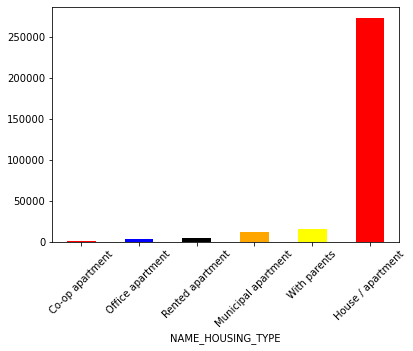

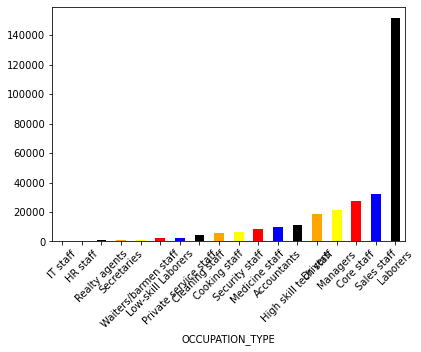

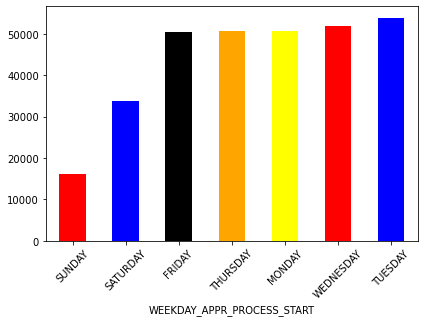

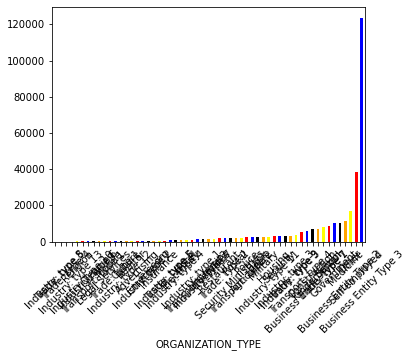

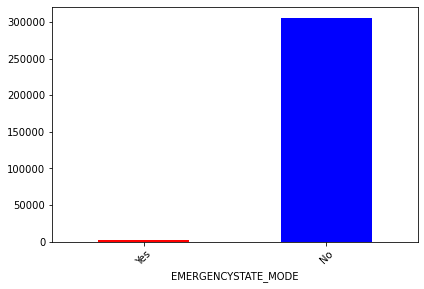

In [53]:
plt.figure(figsize=(6,4))
c = ['red', 'blue', 'black', 'orange', 'yellow']
for i in cat_column:
    bank_cleaned[i].value_counts().sort_values().plot.bar(rot = 0,color=c)
    plt.xlabel(i)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()


<h5>👉👉 Note-This is intial observation to get feel of the data distribution of the categorical column we will see in more detail still our data in not fully prepared for the EDA.

                                  
👉👉1.Cash loan is in high demand compare to the revolving loan                               
👉👉2.In the data number of females are more than the number of male.                        
👉👉3.Most of the people applying for the loan does not own the car.                         
👉👉4.Most of the poeple has their own house applying for the loan.                          
👉👉5.A large number of people coming unaccompanied and after that second highest coming with the family

👉👉6.Most of the working people applying for the loans.

👉👉7.Secondary Education and Higher Education applying are the large number applying for the loans. 

👉👉8.People applying for the loans mostly are married.                                      
👉👉9.Labourers and Business entity are the higest appying for the loan.

<h5> We will check what are the distribution of age in our data

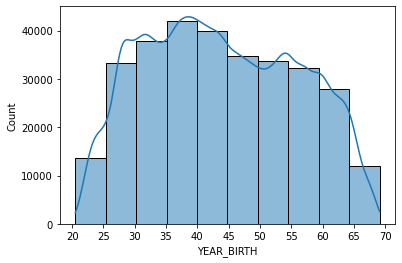

In [54]:
#histogram for Year_birth
sns.histplot(bank_cleaned['YEAR_BIRTH'],bins=10,kde=True)
plt.xticks([20,25,30,35,40,45,50,55,60,65,70]);

<h5>Observation- We can see that people from 30-45 age are the higest number applying for the loan**

<h2>7-Checking for the ouliers

<h5>From data.describe there are 4 columns which are continuous numerical column at present we will deal with these four column and check using the boxplot

In [55]:
column_outliers=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

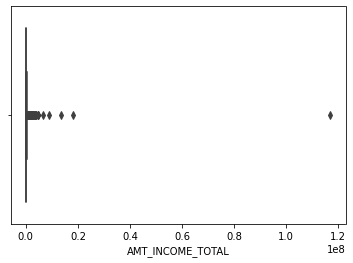

In [56]:
sns.boxplot(bank_cleaned['AMT_INCOME_TOTAL'])

<AxesSubplot:xlabel='AMT_CREDIT'>

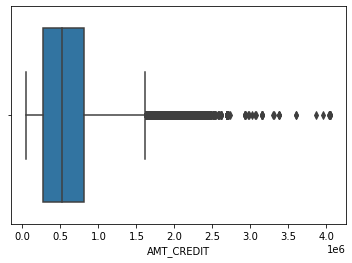

In [57]:
sns.boxplot(bank_cleaned['AMT_CREDIT'])

<AxesSubplot:xlabel='AMT_ANNUITY'>

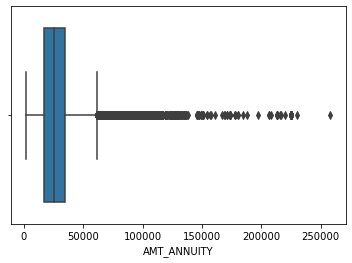

In [58]:
sns.boxplot(bank_cleaned['AMT_ANNUITY'])

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

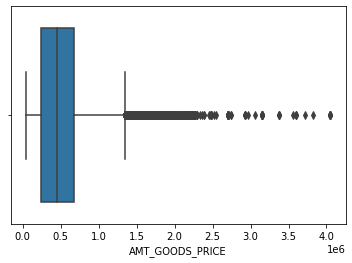

In [59]:
sns.boxplot(bank_cleaned['AMT_GOODS_PRICE'])

In [60]:
bank_cleaned.shape

(307511, 81)

<h5> Action- Since the outliers are present at the higher side and we can visualize so instead of using function or any expression better to remove outliers manually

In [61]:
#removing the outliers manually with the help pf box plot
bank_cleaned=bank_cleaned[bank_cleaned['AMT_INCOME_TOTAL']<800000]
bank_cleaned=bank_cleaned[bank_cleaned['AMT_CREDIT']<2500000]
bank_cleaned=bank_cleaned[bank_cleaned['AMT_ANNUITY']<130000]
bank_cleaned=bank_cleaned[bank_cleaned['AMT_GOODS_PRICE']<1500000]


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

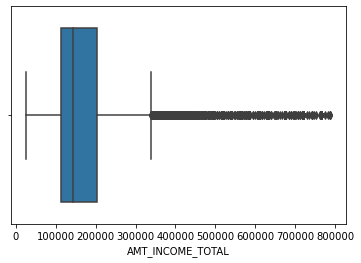

In [62]:
sns.boxplot(bank_cleaned['AMT_INCOME_TOTAL'])

In [63]:
bank_cleaned.shape # new data shape after removing outliers

(300115, 81)

In [64]:
bank_cleaned.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  ...  AMT_REQ_CREDIT_BUREAU_QRT  \
0               Y             0  ...                        0.0   
1               N             0  ...                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  YEAR_BIRTH  YEAR_EMPLOYED YEAR_REGISTRATION  \
0                         1.0        25.9            1.7              10.0   
1                         0.0        45.9            3.3               3.2   

  YEAR_ID_PUBLISH YEAR_LAST_PHONE_CHANGE  
0             5.8                    3.1  
1             0.8                    2.3  

[2 rows x 81 columns]

<h5>Note- We will create new column flag total and drop app all flag column and few unnecessary  column which we are nnot going to use in analysis

In [65]:
#new flag column using iloc
flag_cols=bank_cleaned.iloc[:,50:70].columns
flag_cols

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [66]:
#sum of all the flag column and creating new column flag_doc_total
bank_cleaned['Flag_doc_total']=bank_cleaned.iloc[:,50:70].sum(axis=1)

In [67]:
bank_cleaned.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  ...  AMT_REQ_CREDIT_BUREAU_YEAR  YEAR_BIRTH  \
0               Y             0  ...                         1.0        25.9   
1               N             0  ...                         0.0        45.9   

   YEAR_EMPLOYED  YEAR_REGISTRATION YEAR_ID_PUBLISH YEAR_LAST_PHONE_CHANGE  \
0            1.7               10.0             5.8                    3.1   
1            3.3                3.2             0.8                    2.3   

  Flag_doc_total  
0              1  
1              1  

[2 rows x 82 columns]

In [68]:
bank_cleaned.drop(flag_cols,inplace=True,axis=1)

In [69]:
bank_cleaned.shape

(300115, 62)

In [70]:
bank_cleaned.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  ...  AMT_REQ_CREDIT_BUREAU_YEAR  YEAR_BIRTH  \
0               Y             0  ...                         1.0        25.9   
1               N             0  ...                         0.0        45.9   

   YEAR_EMPLOYED  YEAR_REGISTRATION YEAR_ID_PUBLISH YEAR_LAST_PHONE_CHANGE  \
0            1.7               10.0             5.8                    3.1   
1            3.3                3.2             0.8                    2.3   

  Flag_doc_total  
0              1  
1              1  

[2 rows x 62 columns]

<h5>Note- We will create new Communication total combining all type of communication

In [71]:
bank_cleaned['Commun_Total']=bank_cleaned['FLAG_MOBIL']+bank_cleaned['FLAG_EMP_PHONE']+bank_cleaned['FLAG_WORK_PHONE']+bank_cleaned['FLAG_CONT_MOBILE']+bank_cleaned['FLAG_PHONE']+bank_cleaned['FLAG_EMAIL']

In [72]:
Flag_comm=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

In [73]:
#Dropping the flag communication column
bank_cleaned.drop(Flag_comm,inplace=True,axis=1)

In [74]:
#checking shape of the data
bank_cleaned.shape

(300115, 57)

In [75]:
#creating new column Total_add_match based on the all the region. they lived
bank_cleaned['Total_add_match']=bank_cleaned['REG_REGION_NOT_LIVE_REGION']+bank_cleaned['REG_REGION_NOT_WORK_REGION']+bank_cleaned['LIVE_REGION_NOT_WORK_REGION']+bank_cleaned['REG_CITY_NOT_LIVE_CITY']+bank_cleaned['REG_CITY_NOT_WORK_CITY']+bank_cleaned['LIVE_CITY_NOT_WORK_CITY']

In [76]:
#List of address column
address_cols=['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']

In [77]:
#dropping the address_cols list from the dataframe.
bank_cleaned.drop(address_cols,inplace=True,axis=1)

In [78]:
bank_cleaned.shape

(300115, 52)

In [79]:

bank_cleaned.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  ...  YEAR_EMPLOYED  YEAR_REGISTRATION  \
0               Y             0  ...            1.7               10.0   
1               N             0  ...            3.3                3.2   

   YEAR_ID_PUBLISH  YEAR_LAST_PHONE_CHANGE Flag_doc_total Commun_Total  \
0              5.8                     3.1              1            4   
1              0.8                     2.3              1            4   

  Total_add_match  
0               0  
1               0  

[2 rows x 52 columns]

In [80]:
#List of column looking inappropriate for the analysis
drop_cols=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3',
          'YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE',
          'YEARS_BEGINEXPLUATATION_MEDI','TOTALAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
          'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
          'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

<h5>-At this stage we are again changing out datframe from bank_cleaned to bank_cleaned_new**

In [81]:
#Dropping the unwanted column which we are not going to use and creating new dataaframe
bank_cleaned_new=bank_cleaned.drop(drop_cols,axis=1)

In [82]:
#Current working data. head to check the value and column
bank_cleaned_new.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  ...  YEAR_EMPLOYED  YEAR_REGISTRATION  \
0               Y             0  ...            1.7               10.0   
1               N             0  ...            3.3                3.2   

   YEAR_ID_PUBLISH  YEAR_LAST_PHONE_CHANGE Flag_doc_total Commun_Total  \
0              5.8                     3.1              1            4   
1              0.8                     2.3              1            4   

  Total_add_match  
0               0  
1               0  

[2 rows x 32 columns]

<h5 style=color:red>🪓🪓Action- Now we will create one more column from Code_gender using lambda function giving M to 1 and Female to 0
this will help us if we work on percentage**

In [83]:
#Creating new column CODE_GENDER_NUM based on CODE_GENDER
bank_cleaned_new['CODE_GENDER_NUM']=bank_cleaned_new['CODE_GENDER'].apply(lambda x : 0 if x=='F' else 1)

<h5>Now we will create new categery column TOTALINCOME_BIN using pd.cut method binning in quantile and giving labes as below

In [84]:
#Creating new column TOTALINCOME_BIN based on AMT_INCOME_TOTAL
bank_cleaned_new['TOTALINCOME_BIN']=pd.qcut(bank_cleaned_new['AMT_INCOME_TOTAL'],q=[0,0.2,0.4,0.6,0.8,1.0],labels=['VL','L','M','H','VH'])

In [85]:
#Creating new column Birth_bin based on YEAR_BIRTH
bins= [0,20,30,40,50,60,100]
labels = ['<20','20-30','30-40','40-50','50-60','>60']
bank_cleaned_new['BIRTH_BIN'] = pd.cut(bank_cleaned_new['YEAR_BIRTH'], bins=bins, labels=labels)

In [86]:
#Selecting categorical column for feature selection
cat_cols=bank_cleaned_new.select_dtypes(include=(object,'category')).columns
len(cat_cols)

14

In [87]:
#Selecting numerical column for feature selection
num_cols=bank_cleaned_new.select_dtypes(exclude=(object,'category')).columns
num_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLOORSMAX_MEDI', 'YEAR_BIRTH',
       'YEAR_EMPLOYED', 'YEAR_REGISTRATION', 'YEAR_ID_PUBLISH',
       'YEAR_LAST_PHONE_CHANGE', 'Flag_doc_total', 'Commun_Total',
       'Total_add_match', 'CODE_GENDER_NUM'],
      dtype='object')

In [88]:
#len of current working data.
len(bank_cleaned_new.dtypes)

35

In [89]:
# random cell to check the categeory type by checking here using value count
bank_cleaned_new['YEAR_EMPLOYED'].value_counts()

1000.7    54523
0.6        4429
0.5        3896
0.4        3589
0.7        3551
          ...  
45.7          1
44.9          1
43.6          1
45.6          1
45.4          1
Name: YEAR_EMPLOYED, Length: 464, dtype: int64

<h5>As such there is no formula or code selecting the features So we have see the data.head() and value count and unique value to decide in whichfeature the column will fall but I assure  this is  very very helpful when we will do the EDA for deciding which kind of plot you can apply for valuable insight.

In [90]:
#Feature selection in 4 parts
nominal_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
                    'FLAG_OWN_REALTY','NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                    'OCCUPATION_TYPE','ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']

ordinal_features = ['NAME_EDUCATION_TYPE','TOTALINCOME_BIN','BIRTH_BIN']

continuous_features = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 
                       'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','FLOORSMAX_MEDI',
                       'YEAR_BIRTH','YEAR_EMPLOYED','YEAR_REGISTRATION', 
                       'YEAR_ID_PUBLISH','YEAR_LAST_PHONE_CHANGE']
    

discrete_features = [ 'TARGET', 'CNT_CHILDREN','CNT_FAM_MEMBERS',
                     'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 
                     'Flag_doc_total', 'Commun_Total',
                      'Total_add_match', 'CODE_GENDER_NUM']



In [91]:
#With the len check we are confirmig that features are correctly selected
len(nominal_features)+len(ordinal_features)+len(continuous_features)+len(discrete_features)

34

In [92]:
#checking shape of data on which we are working
bank_cleaned_new.shape

(300115, 35)

<h5>All in order after feature selection there are total 34 feature because we have not included the Id column so out of 35 we have devived 34 features in 4 part now we know or features and these are very helpful when generating insight**

In [93]:
bank_cleaned_T0=bank_cleaned_new[bank_cleaned_new['TARGET']==0]
bank_cleaned_T1=bank_cleaned_new[bank_cleaned_new['TARGET']!=0]

In [94]:
bank_cleaned_new.shape[0]-bank_cleaned_T0.shape[0]-bank_cleaned_T1.shape[0]

0

In [95]:
bank_cleaned_T0.shape

(275602, 35)

In [96]:
bank_cleaned_T1.shape

(24513, 35)

In [97]:
bank_cleaned_T0.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  ...  YEAR_LAST_PHONE_CHANGE  Flag_doc_total  \
1               N             0  ...                     2.3               1   
2               Y             0  ...                     2.2               0   

   Commun_Total  Total_add_match CODE_GENDER_NUM TOTALINCOME_BIN BIRTH_BIN  
1             4                0               0              VH     40-50  
2             5                0               1              VL     50-60  

[2 rows x 35 columns]

<h2 style=color:balck>  Step-8 Univariate Analysis

<h5 style=color:black>Note- Now It seems our data is ready for the analysis, we will use all three data one is bank_cleaned_new and subset of this dataset segtregated according to the T0 and T1. So will use all three data and find out the pattern for defaulter(target1) and non defaulter(traget0).
First we will plot some histogram to see the data distribution..    

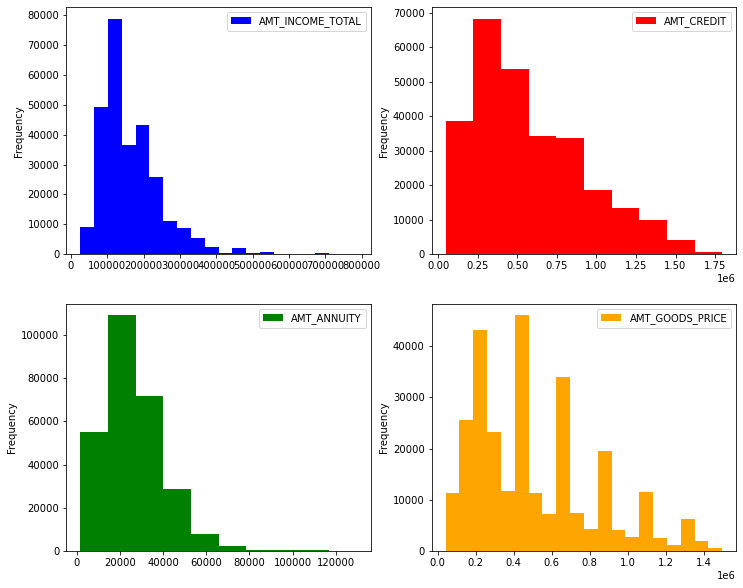

In [98]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
bank_cleaned_T0.plot(kind="hist", y="AMT_INCOME_TOTAL", bins=20, color="b", ax=axes[0][0])
bank_cleaned_T0.plot(kind="hist", y="AMT_CREDIT", bins=10, color="r", ax=axes[0][1])
bank_cleaned_T0.plot(kind="hist", y="AMT_ANNUITY", bins=10, color="g", ax=axes[1][0])
bank_cleaned_T0.plot(kind="hist", y="AMT_GOODS_PRICE", bins=20, color="orange", ax=axes[1][1])
plt.show()

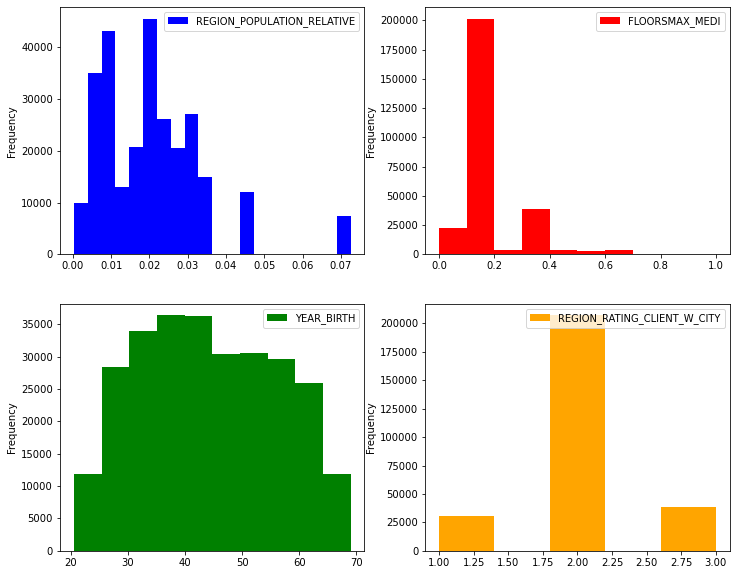

In [99]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
bank_cleaned_T0.plot(kind="hist", y="REGION_POPULATION_RELATIVE", bins=20, color="b", ax=axes[0][0])
bank_cleaned_T0.plot(kind="hist", y="FLOORSMAX_MEDI", bins=10, color="r", ax=axes[0][1])
bank_cleaned_T0.plot(kind="hist", y="YEAR_BIRTH", bins=10, color="g", ax=axes[1][0])
bank_cleaned_T0.plot(kind="hist", y="REGION_RATING_CLIENT_W_CITY", bins=5, color="orange", ax=axes[1][1])
plt.show()

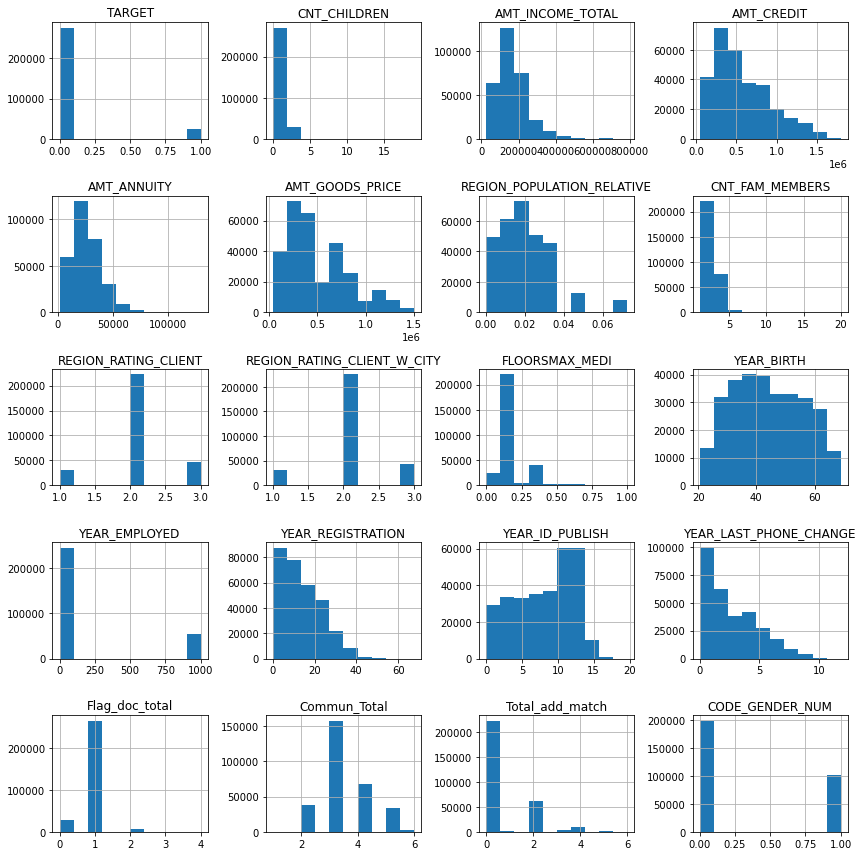

In [100]:
#plotting histogram to check  data distribution
bank_cleaned_new[bank_cleaned_new.columns[1:]].hist(figsize=(12,12))
plt.tight_layout();

<h5 style=color:black>Note above histogram represent the data distribution and these are very helpful for furthure analysis
we can see in which bin data is concentrate and in which bin it is less.

<h5 style=color:black>Observation-From visiting above histogram we can see that most of our data is right skewed.

<h5 style=color:black>  Code_gender is the first thing when person enters a bank we can see it without any introduction. So will start from here we will first check Male VS Female what is pattern for defaulter vs non defaulter

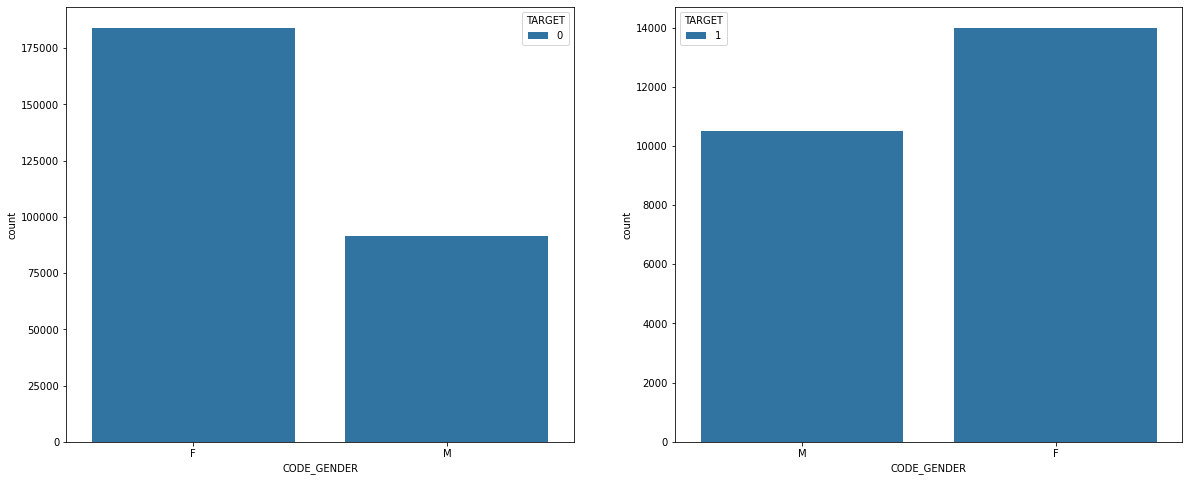

In [101]:
#count plot for male vs female in target 0 and target 1 data
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot('CODE_GENDER',hue='TARGET',data=bank_cleaned_T0,ax=ax[0])
sns.countplot('CODE_GENDER',hue='TARGET',data=bank_cleaned_T1,ax=ax[1]);


<h5 style=color:black>  OBSERVATION

<h5 style=color:black> On comparing above two graph we can see mens are more defaulter compare to the women. On defaulter side mens graph is rising comparing to the female. We will do the more indepth analysis in actual percentage till then keep this graph in mind and revisit this again.

<h5 style=color:black> Note-Since the data is highly imbalanced so we actually require percentage in the graph for analysing, also in the function I have commented out two line if We wish to see total number we can highlight them and comment out last 6 lines before plt.show

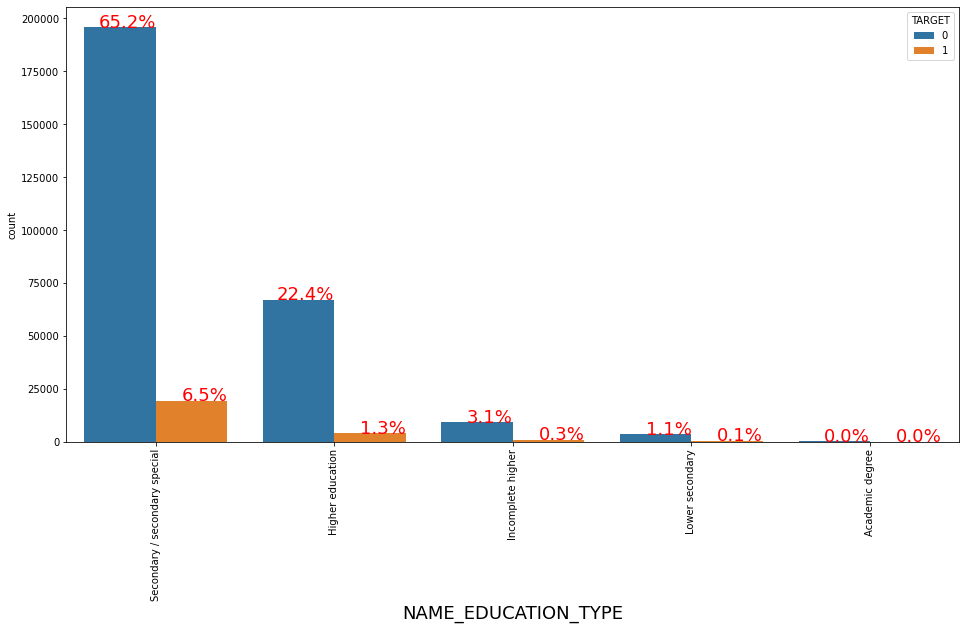

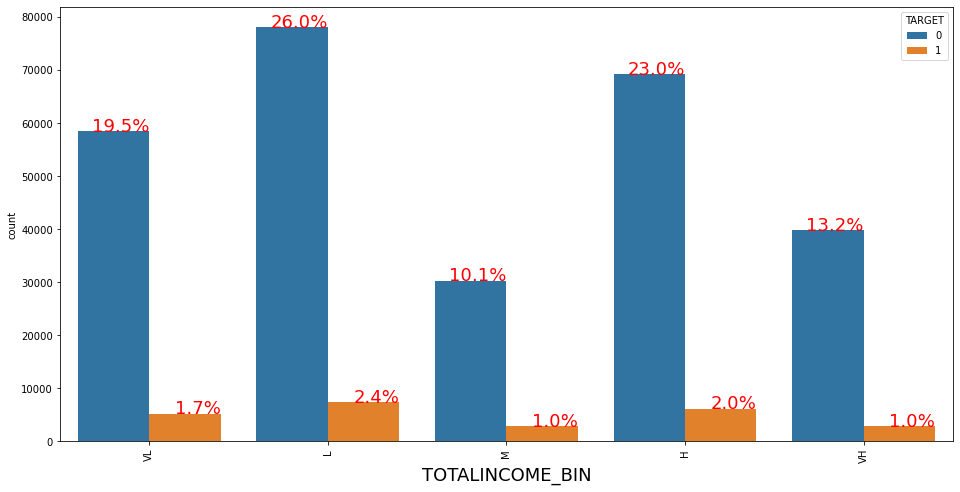

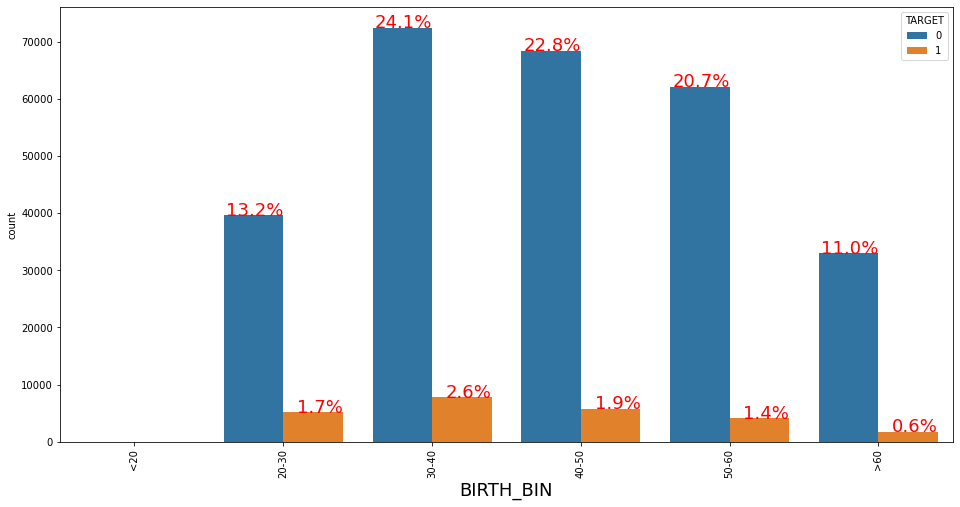

In [102]:
# checking count plot ordinal features in terms of percentage
for i in ordinal_features:
    plt.figure(figsize=(16,8))
    ax=sns.countplot(data=bank_cleaned_new,x = i,hue='TARGET')
    # ax.bar_label(ax.containers[0]) # to see the number count in the graph
    # ax.bar_label(ax.containers[1])
    plt.xticks(rotation=90)
    total = float(len(bank_cleaned_new))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(text=percentage, xy=(x,y),ha='right',fontsize = 18,color='red')
        plt.xlabel(i,fontsize=18)
    plt.show();

    

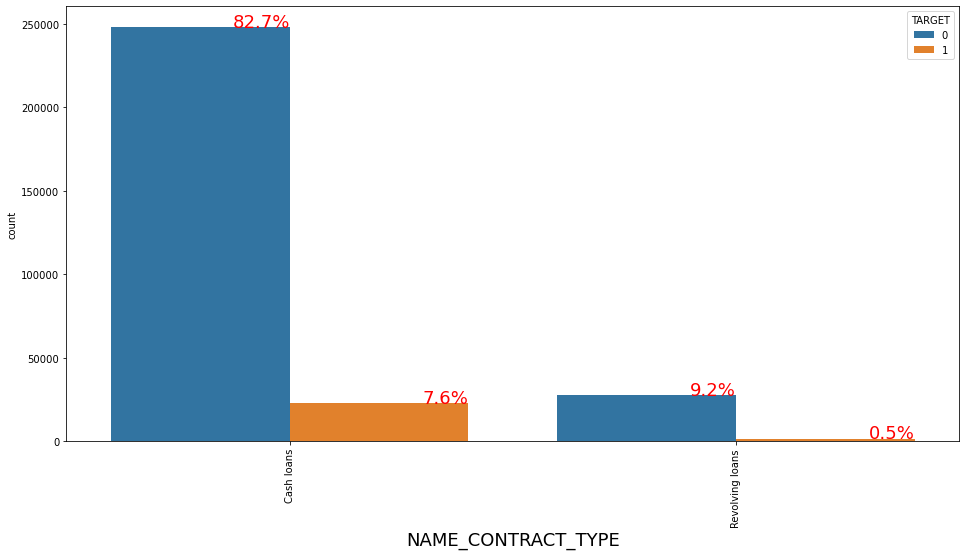

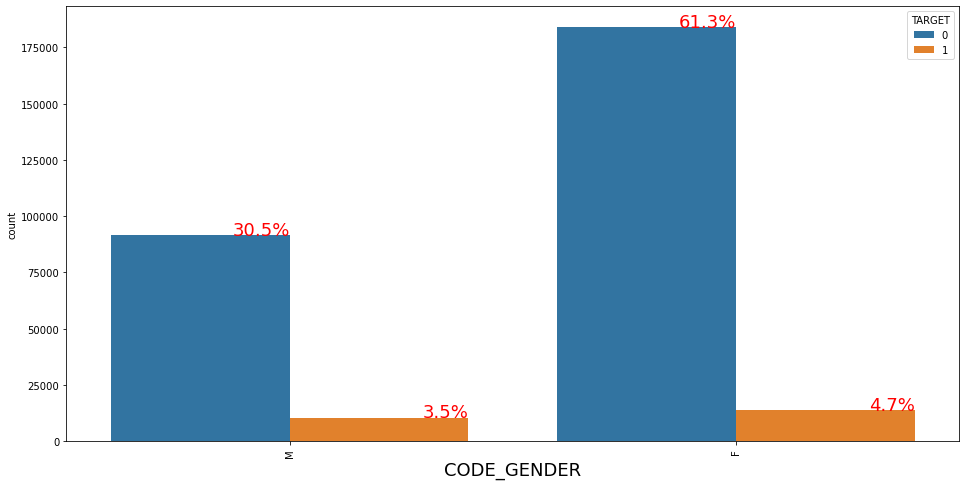

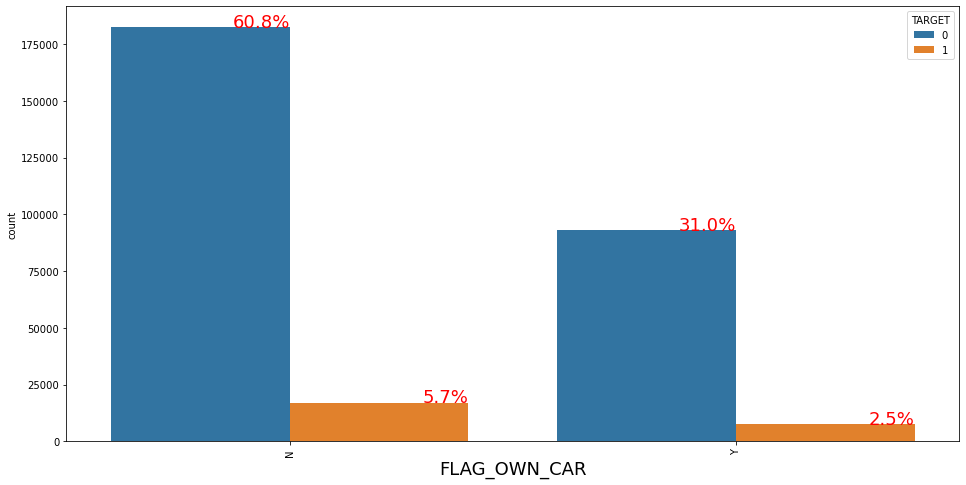

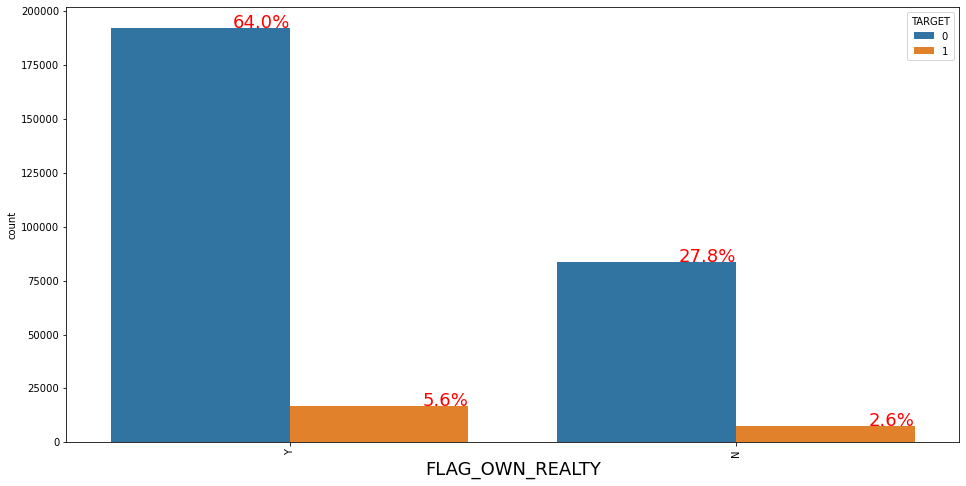

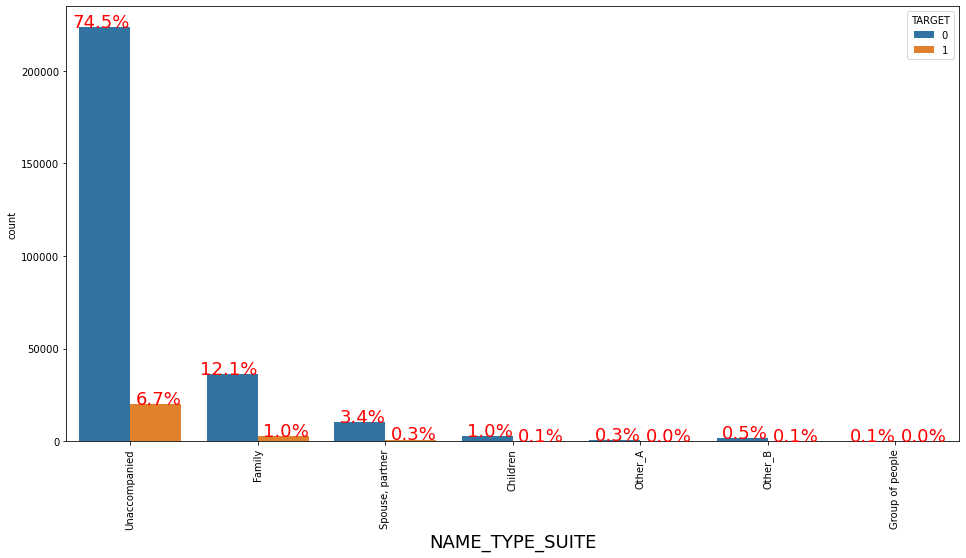

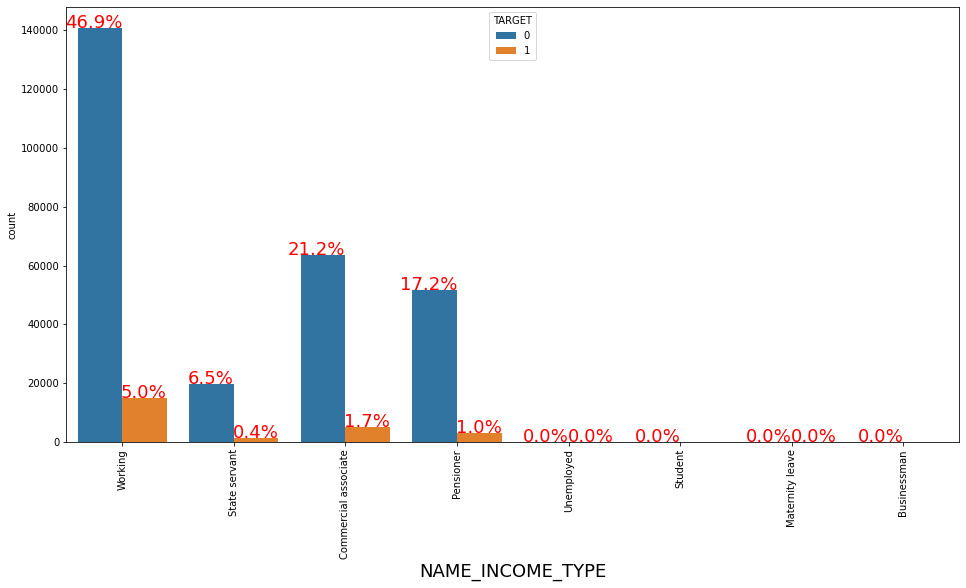

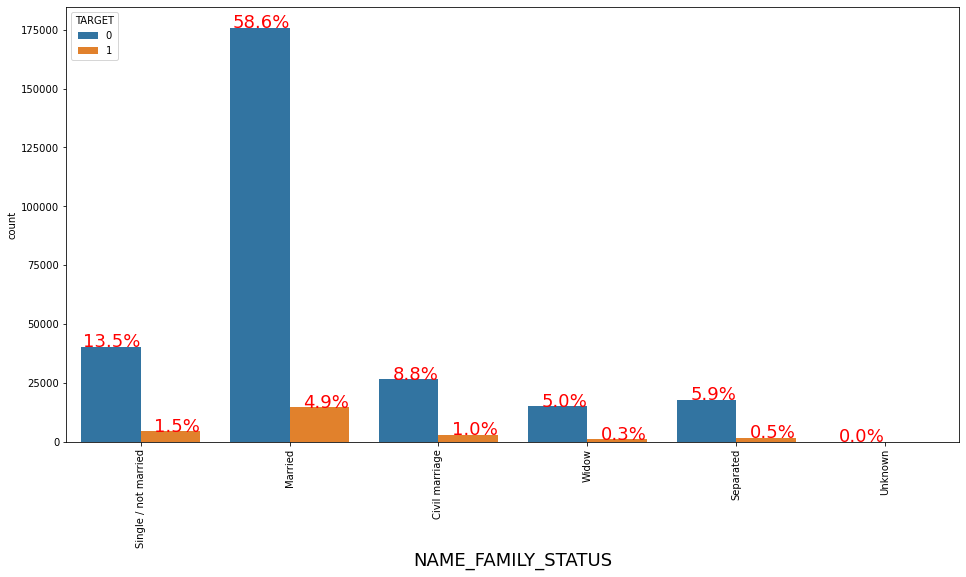

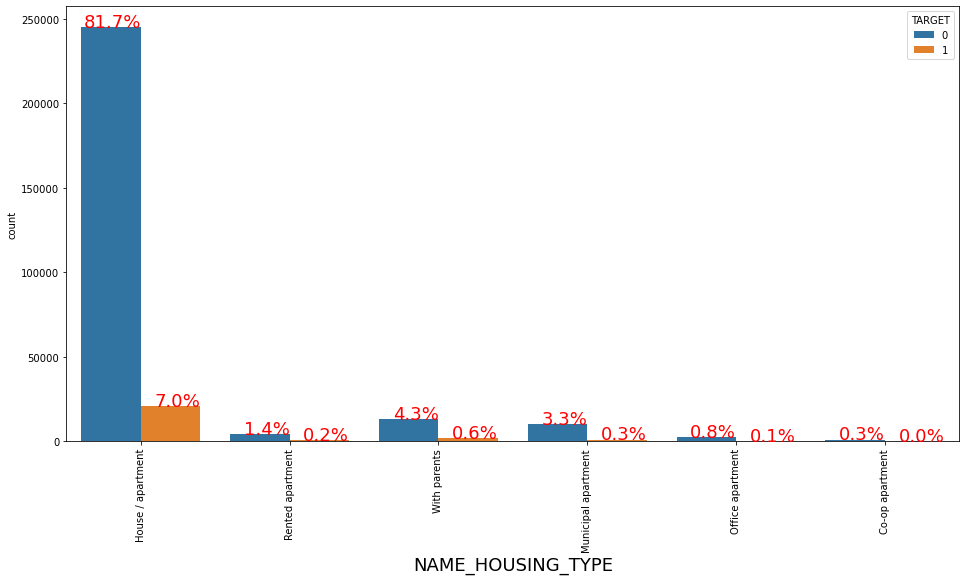

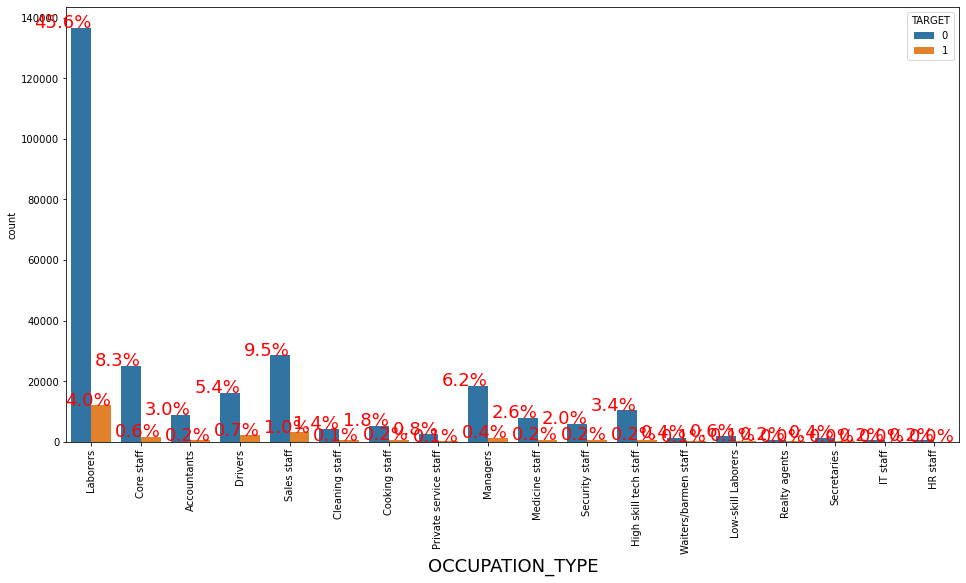

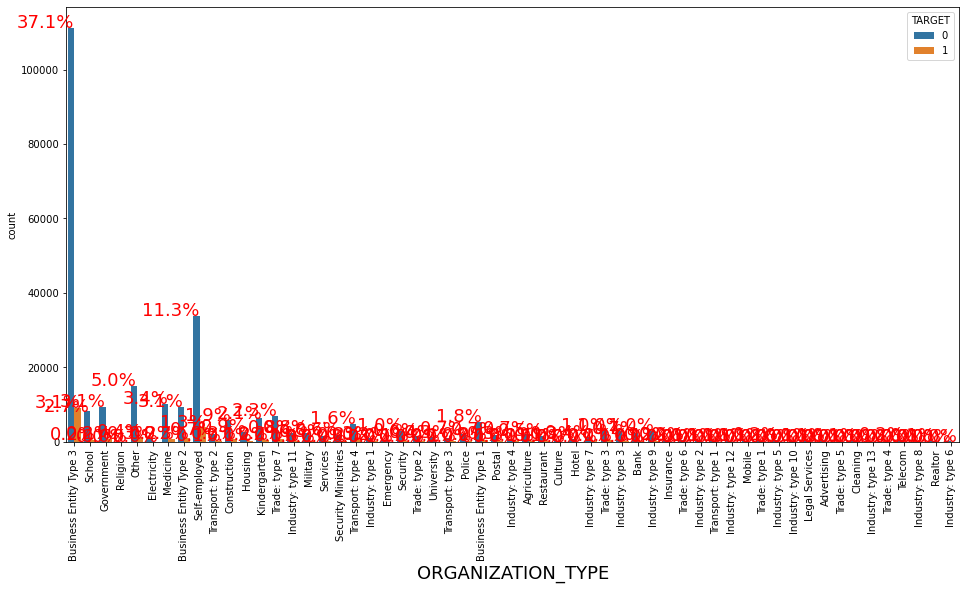

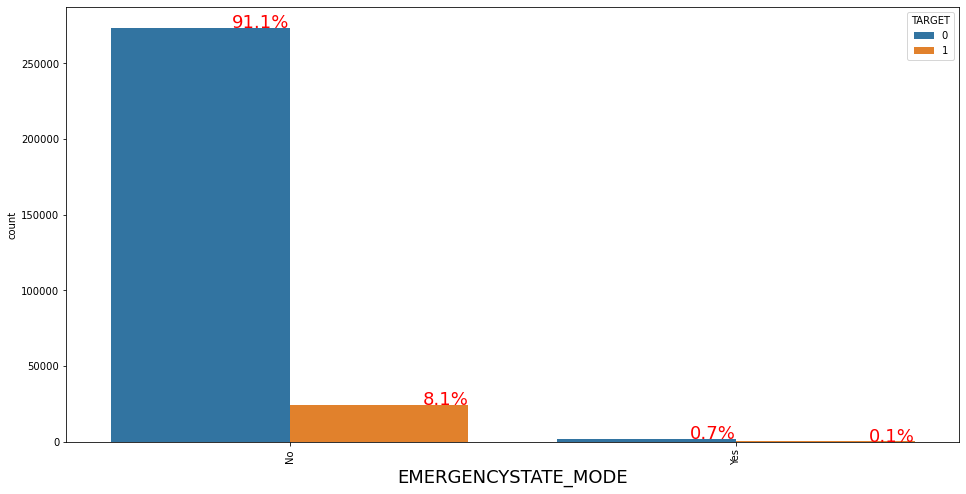

In [103]:
#countplot all the nominal feature with percentage marking
for i in nominal_features:
    plt.figure(figsize=(16,8))
    ax=sns.countplot(data=bank_cleaned_new,x = i,hue='TARGET',orient='vertical')
    plt.xticks(rotation=90)
    total = float(len(bank_cleaned_new))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(text=percentage, xy=(x,y),ha='right',fontsize = 18,color='red')
        plt.xlabel(i,fontsize=18)
    plt.show(); 

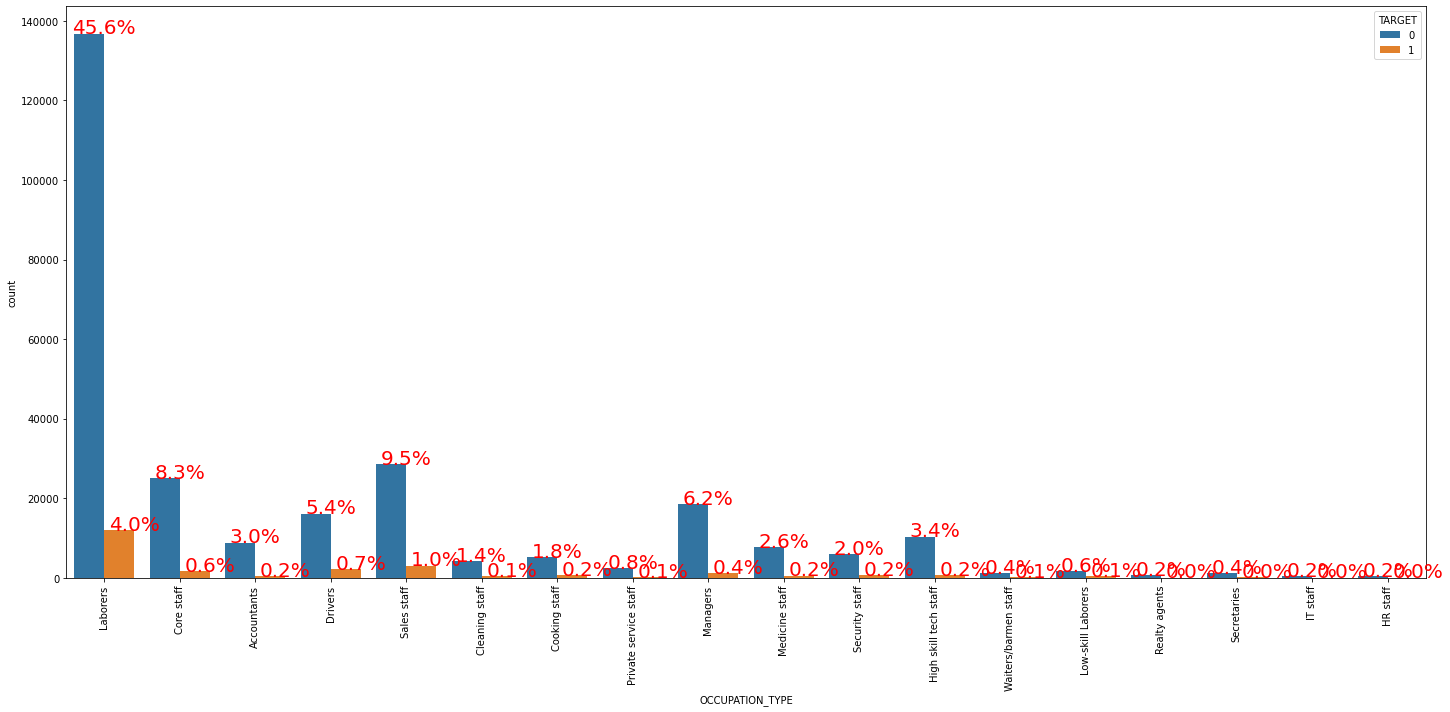

In [104]:
plt.figure(figsize=(20,10))
ax=sns.countplot(data=bank_cleaned_new,x= 'OCCUPATION_TYPE',hue='TARGET')
# plt.yscale('log')
plt.xticks(rotation=90)
plt.tight_layout()
total = float(len(bank_cleaned_new))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',color='red',fontsize=20)
plt.show(); 

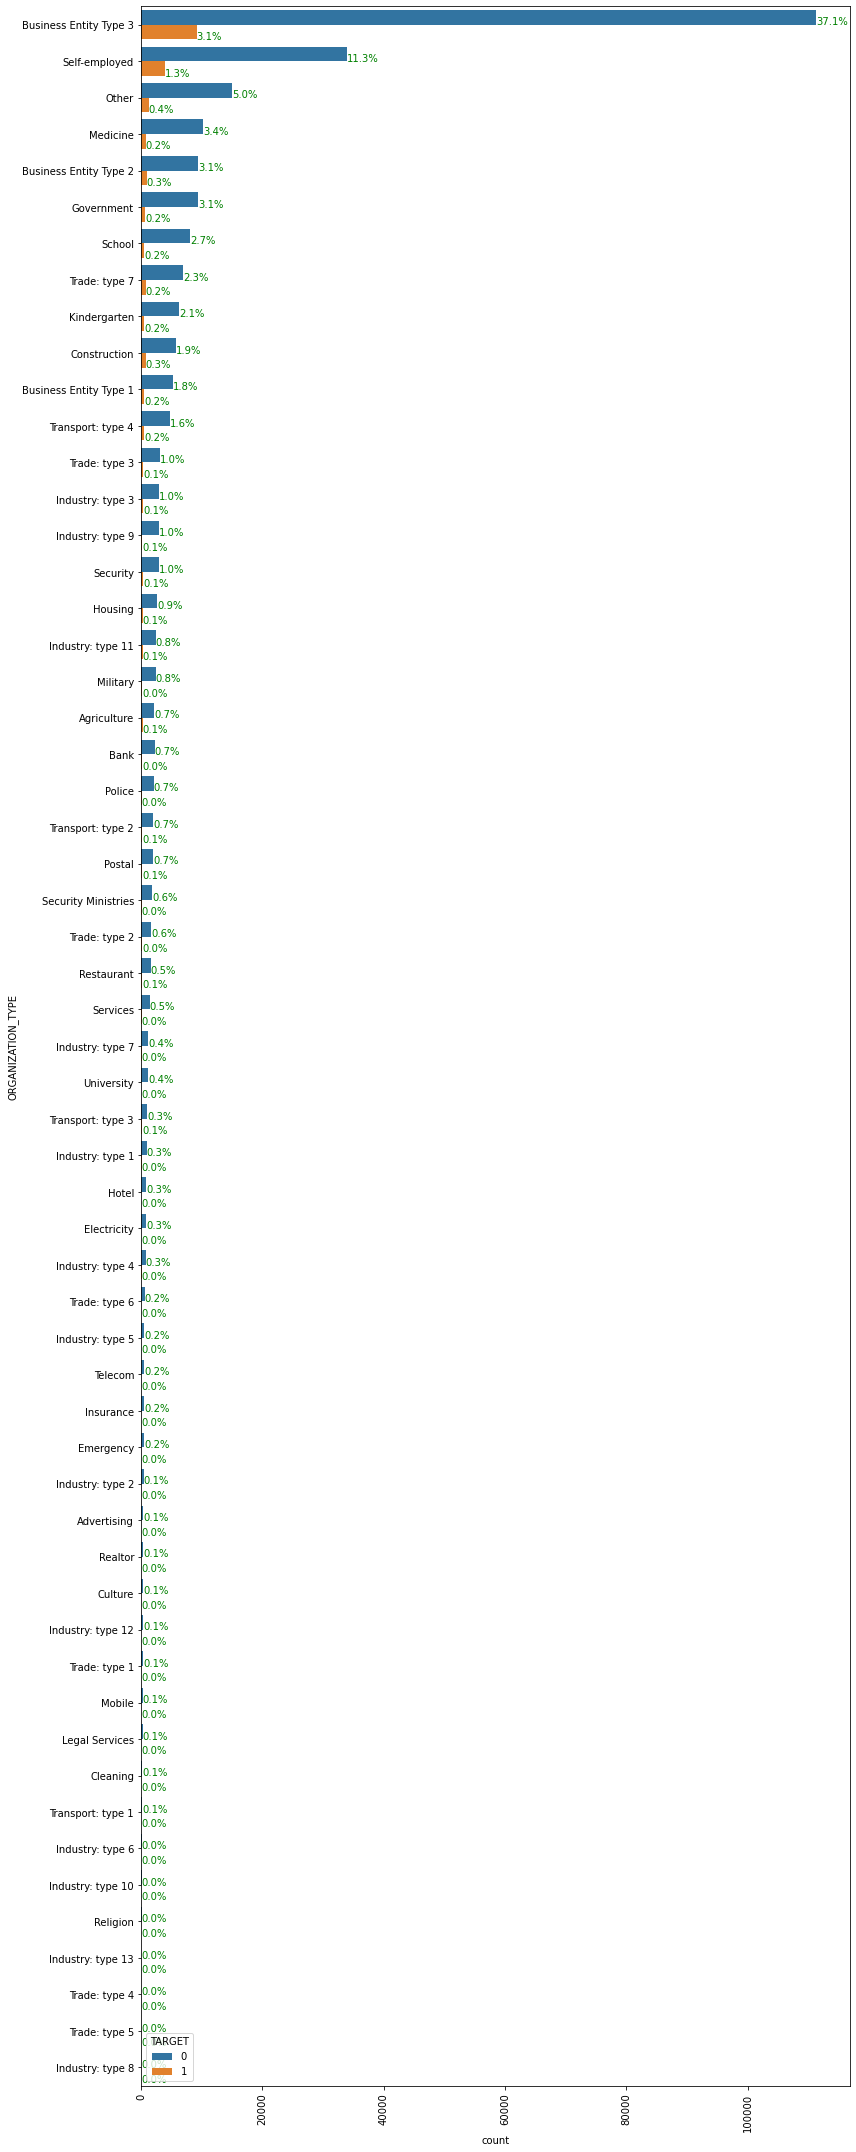

In [105]:
plt.figure(figsize=(12,30))
ax=sns.countplot(y= bank_cleaned_new['ORGANIZATION_TYPE'],
                 order=bank_cleaned_new['ORGANIZATION_TYPE'].value_counts().index,
                 hue=bank_cleaned_new['TARGET'])
plt.xticks(rotation=90)
plt.tight_layout()
total = float(len(bank_cleaned_new))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    y = p.get_y() + p.get_height()
    x = p.get_width()
    ax.annotate(percentage, (x, y),ha='left',color='green',fontsize=10)
plt.show();
    
    
  

<h4 style=color:black>  OBSERVATION OF UNIVARIATE ANALYSIS

<h4 style=color:black>Note-IMPORTANT>> Remember that when concluding do not confuse or misinterpret with the percentage, these are based on the total value. 
for example if we look at the code gender then conclusion is total male are 34% out of that 89.7% are target0(non defaulter) and 10.3% target1(defaulter). For female  total 66% of female out of that 92.9% are target0(non-defaulter) and 7.1% are defaulter.

<p style=color:black> 👉👉 Now these above visualisation clearly identify each and every categeory from the data. 

<p style=color:black> Remember that our data has 92 percent for the non defaulter and 8 percent for the defaulter this is very highy imbalance dataset
So we will discuss in terms of the percentange. We will try to find out the trend for the 0 which is good for bank
business and collect pattern for those 8 percent of the people for which bank suffering loss. 
Try to see the percentage value carefully these are the total from the column. So compare accordigly. If you misinterpret you will land up to wrong conclussion. Read above VVIMP note  I have tried to clearify percentage column.

<p style=color:black>👉👉 Note from the above graph we will take majority of the categeory who are contributing more to the bank business and also falling under the defaulter categeory. 


<p style=color:black>👉👉 1.Name Education Type-  Seconday/special education and Higher Education are contributing almost 94% of the completed data. In Seconday/special 0-65.2% and 1-6.5 and in Higher Education 0-22.4% and 1-1.3, so we can say that Higher education is more reliable because Non_defaulters are 94.5 percent and defualter 5.7percent.  

<p style=color:black>👉👉 2.Total_income_bin-  Those who are having VH income and M(Medium) income are applying for the loan almost half of the other income type. Also people in the bin of high income are more reliable comparing to others.


<p style=color:black>👉👉 3.Birth_bin-  We can see from the graph that People in age bin of 50-60 are more relieable. Also people in bin 20-30 and 30-40 has higest numer of defaulter compare to other.

<p style=color:black>👉👉 4.Name_contract_type-  Though we can see that 90% of the people applying for the cash loans and only 10% are in the revolving loan and we compare both number of defauter are less in the revolving loan comparing to the Cash loan.

<p style=color:black>👉👉 5.Code gender- In application males are 34% and Females are 66%. Also we can see Male defaulter 10.3% and Non-defaulter 89.7%. For female defaulter 7.1% and non-Defaulter is 92.9%. So Female are good customer in terms of paying loans and also good in number for applying loans.

<p style=color:black>👉👉 6.Flag_own_car- We can see  those who are having the car applying for the loan more than the people having the car. There is very little difference but we can say people having car are more reliable than who does not own the car.

<p style=color:black>👉👉 7.Flag_own_reality- Those who have their own house are compratively twice the people not having their own house and appatment but if we talk about the target0 and target 1 both are equal. So for business purpose bank should focus on the people who has their own house as these are higher Customers.

<p style=color:black>👉👉 8.Name_Suite_type- Unaccompanied people are highest almost 80% of the total and family are the second highest percentage wise both have same number of the defaulter. 

<p style=color:black>👉👉 9.Name_Income_Type- Working (total-52%), commercial(Total-23%) and Pensionner( 18%) these 3 are higher in number and number of defaulter are very less in Commercials and in Penssionner compare to the Working. Pensionners have 94.5% Non-defaulter and only 5.5% of the defaulter.

<p style=color:black>👉👉 10.Name_Family_status- Total Married(63.5%),Single/Not Married(15%),Civil marriage(9.8%), Seprated(6.4%) and Widow(5.3%). If we check for defaulter then Civil marriage and single/not married have highest number of defaulter about 10% . Widow has very less number of defaulter only 5.66%  

<p style=color:black>👉👉 11.OCCUPATION_TYPE- Labourers, core staff, managers and Sales staff is four highest categeory Labourers are the highest applicants almost 50% of the total. Numbers of defaulter are highest in Sales Staff on comparing these four. Also core staff and managers have very less number of defaulter. 

<p style=color:black>👉👉 12.Organisation type-Business Entity 3 and Self employed are highest in demanding loan. For defaulter and no defaulter check below.

<h2 style=color:black>  Step-9 Bivariate-Multivariate Analysis

<p style=color:black>👉👉 Now we are aware of the top categeory and their position as per defaulter Vs Non defaulter

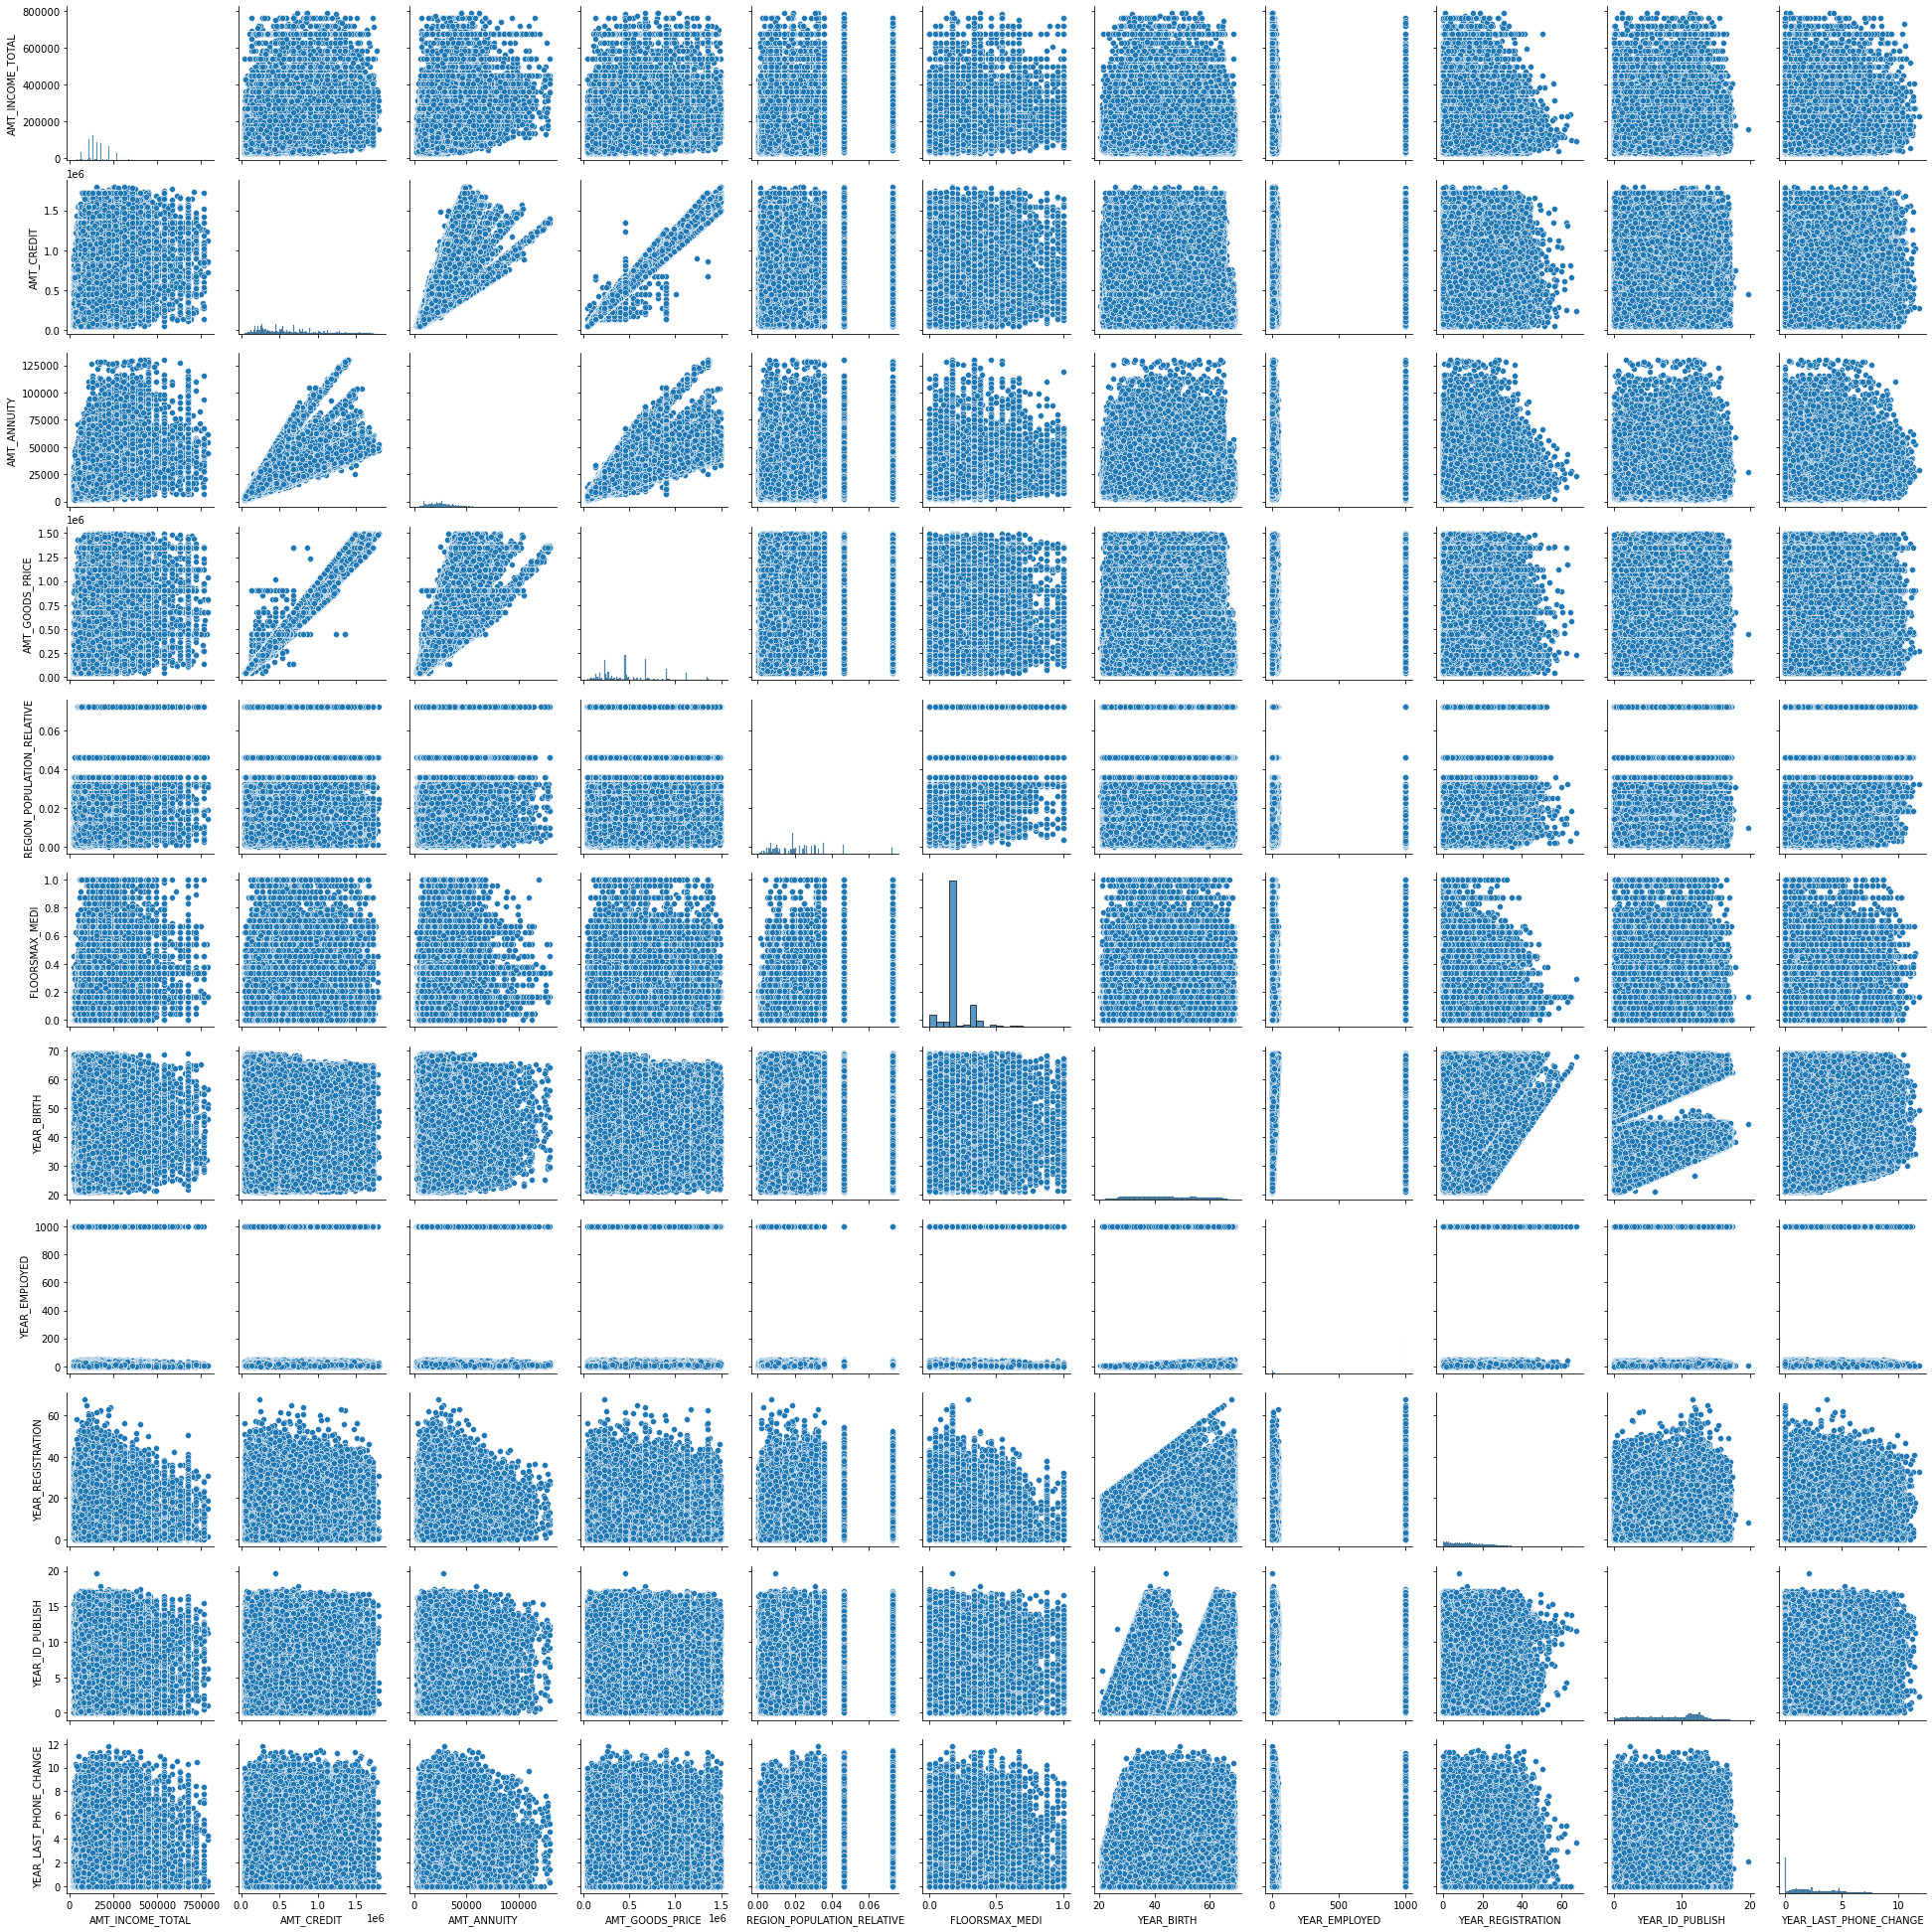

In [106]:
sns.pairplot(bank_cleaned_new[continuous_features])

<p> From above pairplot we can see some strong linear corelation lets pickup these and plot seprately

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='AMT_GOODS_PRICE'>

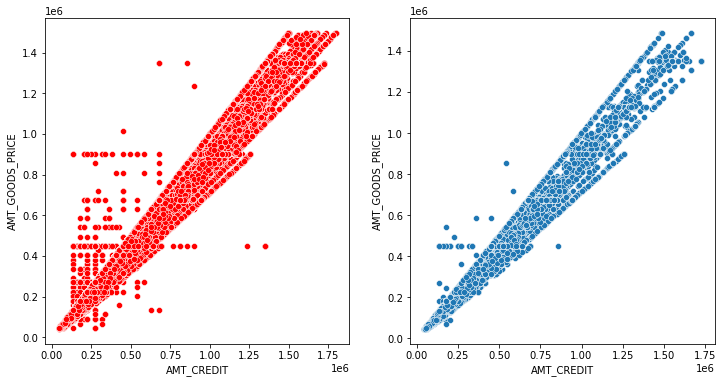

In [107]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(x="AMT_CREDIT", y="AMT_GOODS_PRICE",color='red', data=bank_cleaned_T0,ax=ax[0])
sns.scatterplot(x="AMT_CREDIT", y="AMT_GOODS_PRICE", data=bank_cleaned_T1,ax=ax[1])

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='AMT_ANNUITY'>

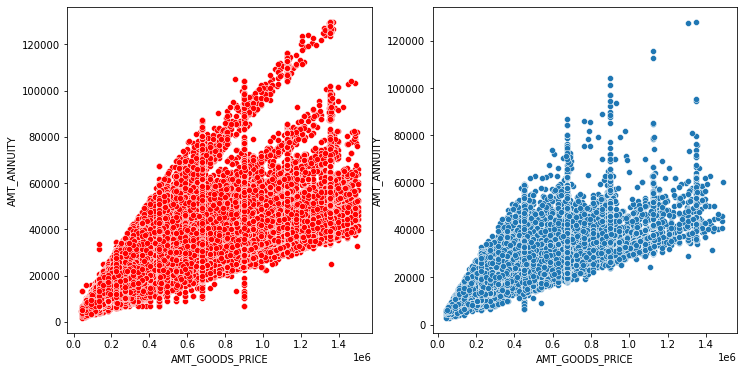

In [108]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.scatterplot(x="AMT_GOODS_PRICE", y="AMT_ANNUITY",color='red', data=bank_cleaned_T0,ax=ax[0])
sns.scatterplot(x="AMT_GOODS_PRICE", y="AMT_ANNUITY", data=bank_cleaned_T1,ax=ax[1])

<p> We can strong linear relationship between in these two categeory so when analysis one of it should be removed as they strongly related to other. Also we can see the pattern for the dafaulter and non defaulter is same.

<p> Now we will see relationship between numerical categeory using heatmap

<AxesSubplot:>

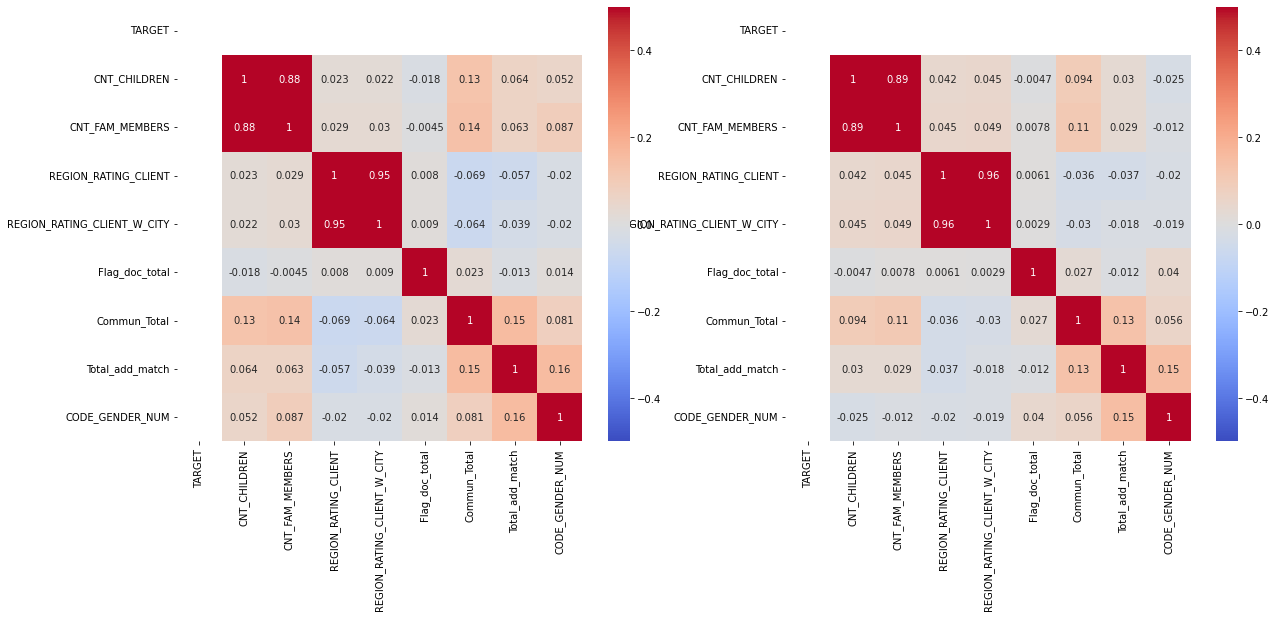

<Figure size 720x720 with 0 Axes>

In [109]:
f,ax=plt.subplots(1,2,figsize=(20,8))
plt.figure(figsize=(10,10))
sns.heatmap(bank_cleaned_T0[discrete_features].corr(),annot=True,cmap='coolwarm',vmin= -0.5,vmax=0.5,ax=ax[0])
sns.heatmap(bank_cleaned_T1[discrete_features].corr(),annot=True,cmap='coolwarm',vmin= -0.5,vmax=0.5,ax=ax[1])

<AxesSubplot:>

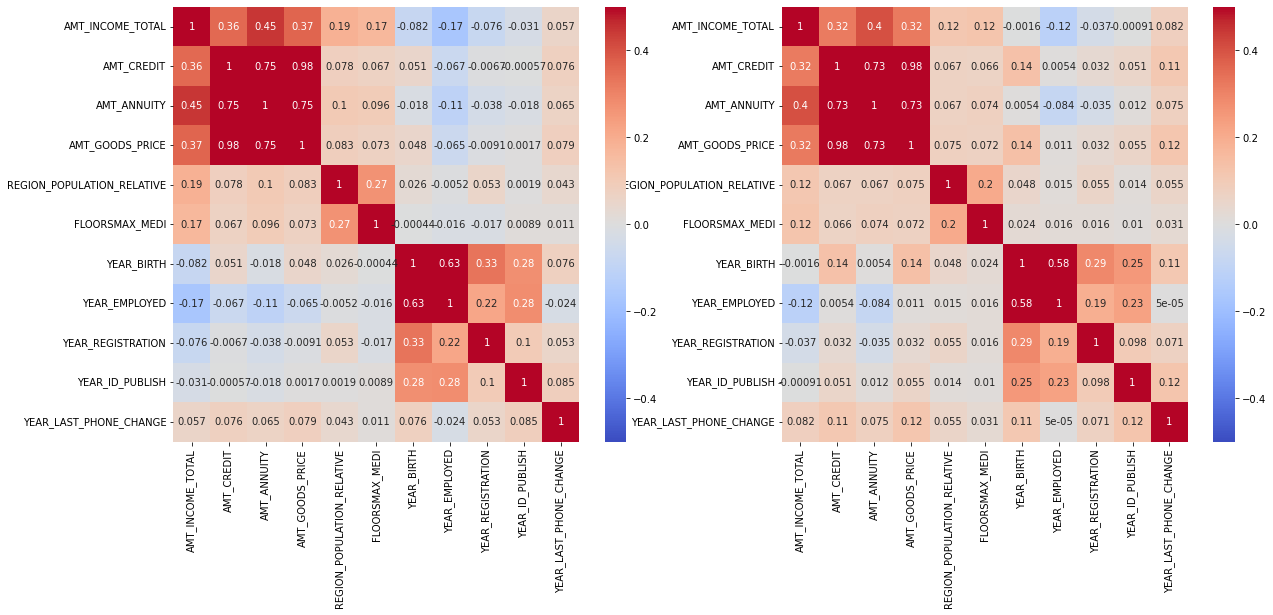

<Figure size 720x720 with 0 Axes>

In [110]:
f,ax=plt.subplots(1,2,figsize=(20,8))
plt.figure(figsize=(10,10))
sns.heatmap(bank_cleaned_T0[continuous_features].corr(),annot=True,cmap='coolwarm',vmin= -0.5,vmax=0.5,ax=ax[0])
sns.heatmap(bank_cleaned_T1[continuous_features].corr(),annot=True,cmap='coolwarm',vmin= -0.5,vmax=0.5,ax=ax[1])

<p style=color:black>👉👉 We can see the pattern for the dafaulter and non defaulter is same. But for complete dataset we can draw the following conclusion

<p style=color:black>👉👉 Discrete features-Above graph we can see cnt_childern and cnt_family member has strong co relation and region rating client and region rating client w city and strong co relation.

<p style=color:black>👉👉 Continious Features-WE can see two patches one at the left hand upper corner and one at the right hand lower corner. 
these both have 4 columns and have have strong corelation amongs themselves. 1st patch have 4 column namely-'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE' and other group have YEAR_BIRTH', 'YEAR_EMPLOYED', 'YEAR_REGISTRATION', 'YEAR_ID_PUBLISH','YEAR_LAST_PHONE_CHANGE'.

<p style=color:black>👉👉 As such we do not see any strong negative co relation between any of the features.

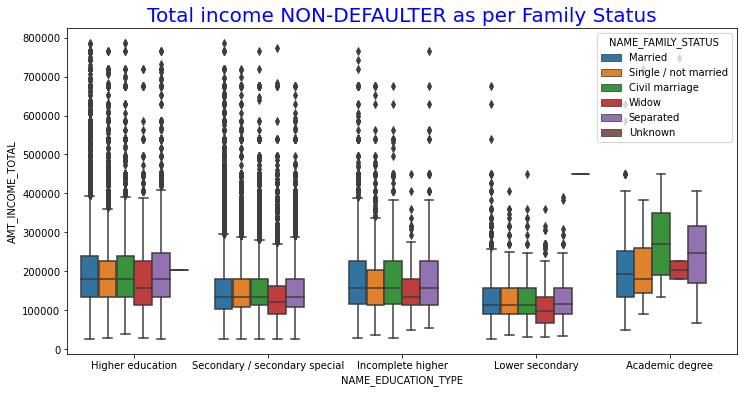

In [111]:
# Box plot for Credit amount
plt.figure(figsize=(12,6))
plt.title('Total income NON-DEFAULTER as per Family Status',fontsize=20,color='blue')
sns.boxplot(data =bank_cleaned_T0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.show()

<p style=color:RED>Observation for NON-DEFAULTER

<p style=color:black>👉👉 Family having the academic degree have higher income compare to other. Also we can see in academic degree those who did civil marriage have higher income amongs all. 

<p style=color:black>👉👉 Income range of the lower secondary is very low comparing to all.

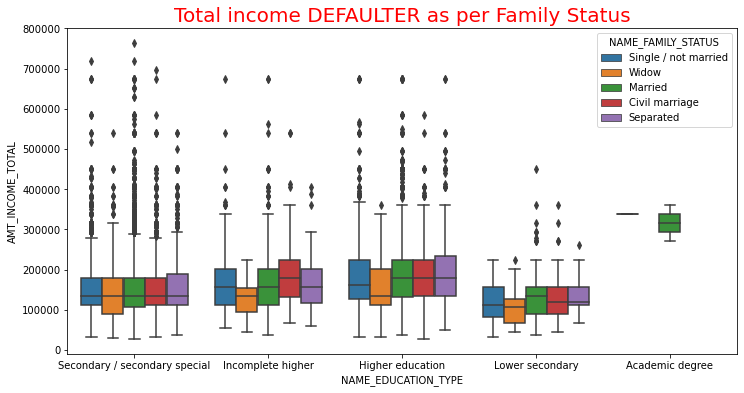

In [112]:
plt.figure(figsize=(12,6))
plt.title('Total income DEFAULTER as per Family Status',fontsize=20,color='red')
sns.boxplot(data =bank_cleaned_T1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.show()

##### <span style="color:black"> Observation for   <span style="color:red"> DEFAULTER

<p style=color:black>Income range is low of all the defaulter compare to the non defaulter

<p style=color:black>Income range of widow is less compare to other in same education type.

<p style=color:black> Except married people there are no other defaulter present in the graph

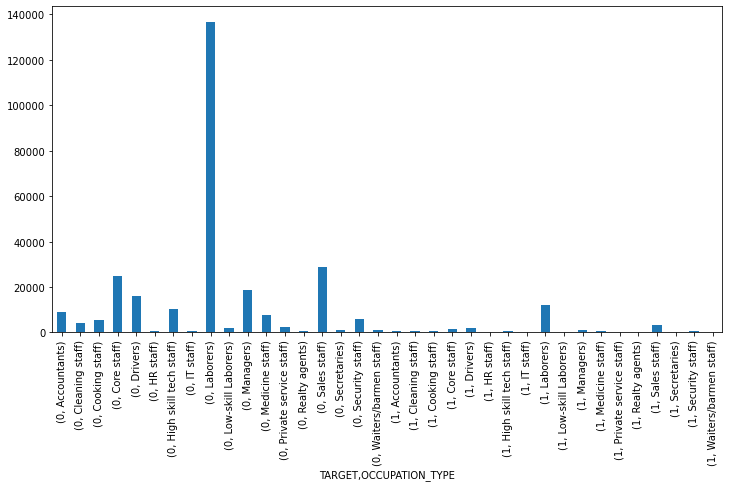

In [113]:
#grouping target with other categeory
bank_cleaned_new.groupby(['TARGET','OCCUPATION_TYPE']).count()['CODE_GENDER'].plot(kind='bar',figsize=(12,6));


<AxesSubplot:xlabel='OCCUPATION_TYPE,CODE_GENDER'>

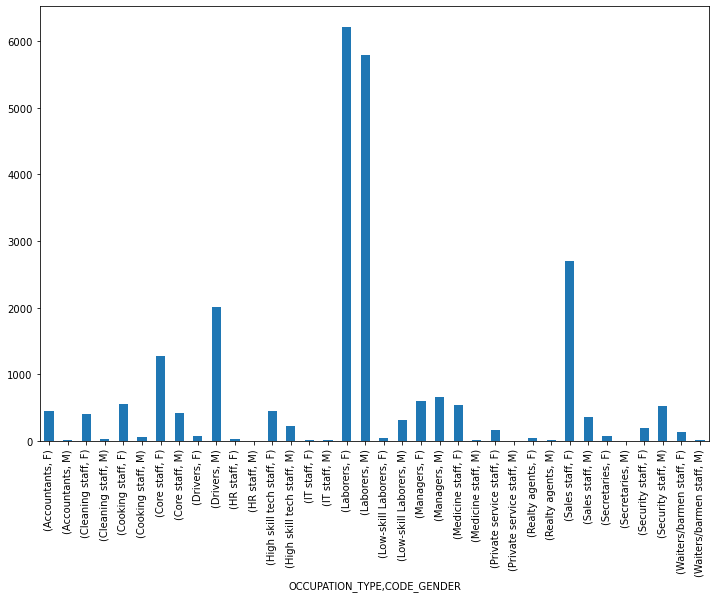

In [114]:
plt.figure(figsize=(12,8))
bank_cleaned_new.groupby(['OCCUPATION_TYPE','CODE_GENDER']).sum()['TARGET'].plot(kind='bar')

<p style=color:black> Observation- We can see labourers(both male and female), Sales staff(female),Drivers(female) and core staff(Female) are mostly applying for the loans. But from here we can not conclude who is the good or bad customers for bank

In [115]:
bank_cleaned_new.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  ...  YEAR_LAST_PHONE_CHANGE  Flag_doc_total  \
0               Y             0  ...                     3.1               1   
1               N             0  ...                     2.3               1   
2               Y             0  ...                     2.2               0   
3               Y             0  ...                     1.7               1   
4               Y             0  ...                     3.0               1   

   Commun_Total  Total_add_match CODE_GENDER_NUM TOTALINCOME_BIN BIRTH_BIN  
0             4                0               1               H     20-30  
1             4                0               0              VH     40-50  
2             5                0               1              VL     50-60  
3             3                0               0               L     50-60  
4             3                2               1               L     50-60  

[5 rows x 35 columns]

#### <p style=color:black>👉 We can see the count as per the group by but since the data is highly imbalaced so we have to find out 92% vs 8%. for that we will use the cross tab function of the pandas

<p style=color:grey> First we will check only organisation type because these have 18 unique value in the column,With the percentage we can Definitely differenciate between defaulter and non defaulter categeory

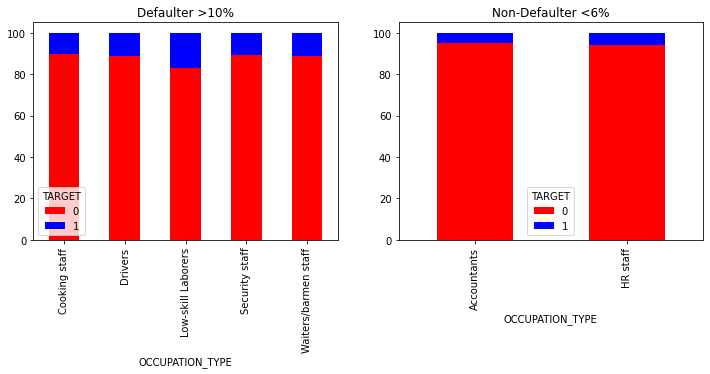

In [116]:
group_occ=(pd.crosstab(index= bank_cleaned_new['OCCUPATION_TYPE'], 
                       columns= bank_cleaned_new['TARGET'], 
                       values= bank_cleaned_new['TARGET'], 
                       aggfunc ='count',
                       margins=True,margins_name='Total',
                       normalize= 'index')*100).round(1)
fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2,figsize=(12,4))
group_occ[group_occ[1]>10].plot(ax=ax1,kind='bar',mark_right = True, stacked=True, color=['red','blue'], grid=False,title='Defaulter >10%')
group_occ[group_occ[1]<6].plot(ax=ax2,kind='bar',mark_right = True, stacked=True, color=['red','blue'], grid=False,title='Non-Defaulter <6%');






<p style=color:black> In occupation_type Accountants and HR staff are the good as being Non-Defaulter

<p style=color:black>In occupation_type cooking staff,Drivers,low skill labourers,security staff and waitress/barmen staff are poor performer for replaying the loan ammount

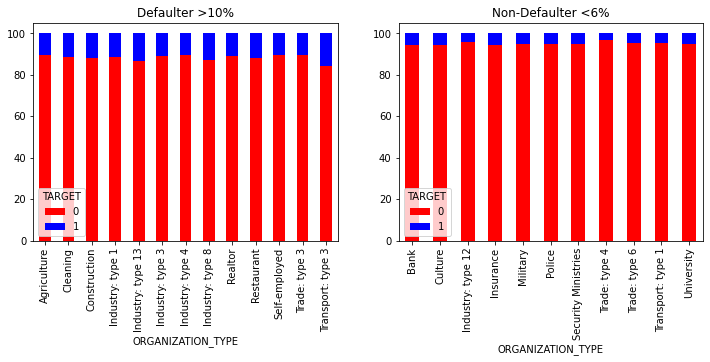

In [117]:
group_occ=(pd.crosstab(index= bank_cleaned_new['ORGANIZATION_TYPE'], 
                       columns= bank_cleaned_new['TARGET'], 
                       values= bank_cleaned_new['TARGET'], 
                       aggfunc ='count',
                       margins=True,margins_name='Total',
                       normalize= 'index')*100).round(1)
fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2,figsize=(12,4))
group_occ[group_occ[1]>10].plot(ax=ax1,kind='bar',mark_right = True, stacked=True, color=['red','blue'], grid=False,title='Defaulter >10%')
group_occ[group_occ[1]<6].plot(ax=ax2,kind='bar',mark_right = True, stacked=True, color=['red','blue'], grid=False,title='Non-Defaulter <6%');


<h5 style=color:black> Good customer- Bank,Culter,Industry type12,Insurance,Military,Police,Security Ministries,Trade type-4,trade type 6,Transport type-1 and university

<h5 style=color:black>  Poor customer- Agriculter, cleaning,constrution, industry type-1, industry type13,industry type3,industry type4,industry type8,Realtor,Restaurant,Self Employed,Trade Type-3 and Transport type 3

<h5 style=color:red> Now we will group Name education and code genter together and will check the daulter vs no defaulter as per the percentage wise

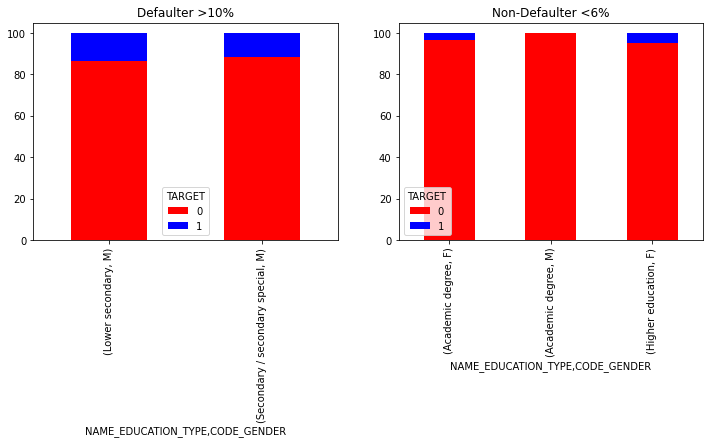

In [118]:
group_edu=(pd.crosstab(index= [bank_cleaned_new['NAME_EDUCATION_TYPE'], bank_cleaned_new['CODE_GENDER']],
                       columns= bank_cleaned_new['TARGET'], 
                       values= bank_cleaned_new['TARGET'], 
                       aggfunc ='count' ,
                       margins=True,margins_name='Total',
                       normalize= 'index')*100).round(1)
# group_edu.plot(kind='bar',stacked=True,color=['red','blue'], grid=True,figsize=(12,6)) # to see full plot
fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2,figsize=(12,4))
group_edu[group_edu[1]>10].plot(ax=ax1,kind='bar',mark_right = True, stacked=True, color=['red','blue'], grid=False,title='Defaulter >10%')
group_edu[group_edu[1]<6].plot(ax=ax2,kind='bar',mark_right = True, stacked=True, color=['red','blue'], grid=False,title='Non-Defaulter <6%');


 <H1 style=color:black> Observation

<h5 style=color:black> Good customer - Female having higher education and both male and female having academic degree have good record to being as non defaulter

<h5 style=color:black> Poor customer - Males belongs to Lower secondary education and Secondary/Secondary special are more dafaulter.

<h5 style=color:red> Note -Below two cells are comment out if require we see the percentage numerically 

In [119]:
# group_occ[group_occ[1]>10] # Numerically also we can check defaulter and non defaulter

In [120]:
# group_occ[group_occ[1]<6] # Numerically also we can check defaulter and non defaulter

<h5 style=color:red> Now we will group occupation and gender column

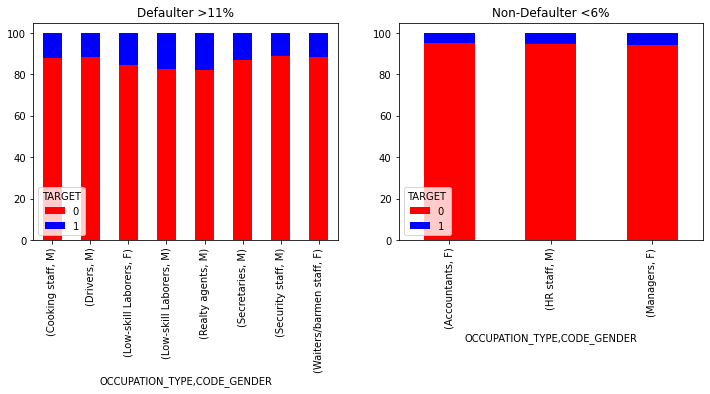

In [121]:
group_occ=(pd.crosstab(index= [bank_cleaned_new['OCCUPATION_TYPE'], bank_cleaned_new['CODE_GENDER']],
                       columns= bank_cleaned_new['TARGET'], 
                       values= bank_cleaned_new['TARGET'], 
                       aggfunc ='count' ,
                       margins=True,margins_name='Total',
                       normalize= 'index')*100).round(1)

fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2,figsize=(12,4))
group_occ[group_occ[1]>11].plot(ax=ax1,kind='bar',mark_right = True, stacked=True, color=['red','blue'], grid=False,title='Defaulter >11%')
group_occ[group_occ[1]<6].plot(ax=ax2,kind='bar',mark_right = True, stacked=True, color=['red','blue'], grid=False,title='Non-Defaulter <6%');


In [122]:
# group_occ[group_occ[1]<6] # to check numerically

In [123]:
# group_occ[group_occ[1]>11] # to check numerically

 <p style=color:black> Observation

<p style=color:black>-Good customers- Accountants(female), Hr staff(male ) and managers(females) are very good customers their rate for being as dafaulter is below 6 percent

<p style=color:black>-Reality state male and low skilled labour both male and female are very very poor performance(>15%) for repaying the loans also
drivers(male), cooking staff (male),Secretaries(male),Security staff(male), waiters/barmen staff(female) these are more than 11 percent defaulter.


<h5 style=color:red> Note using the pivot table for the same group we can see the numerical total value and also if require we can plot as well. 

In [124]:
pd.pivot_table(data=bank_cleaned_new,index= ['NAME_EDUCATION_TYPE','CODE_GENDER'],
                       columns= 'TARGET', 
                       values= 'CODE_GENDER_NUM', 
                       aggfunc ='count' ,
                       margins=True,margins_name='Total'
                       )

TARGET                                            0        1   Total
NAME_EDUCATION_TYPE           CODE_GENDER                           
Academic degree               F                92.0      3.0      95
                              M                58.0      NaN      58
Higher education              F             45626.0   2363.0   47989
                              M             21511.0   1510.0   23021
Incomplete higher             F              5669.0    494.0    6163
                              M              3510.0    362.0    3872
Lower secondary               F              2090.0    214.0    2304
                              M              1284.0    203.0    1487
Secondary / secondary special F            130615.0  10919.0  141534
                              M             65147.0   8445.0   73592
Total                                      275602.0  24513.0  300115

<h5 style=color:red> Now we will create group of 3 and again segregate defaulter vs non defaulter

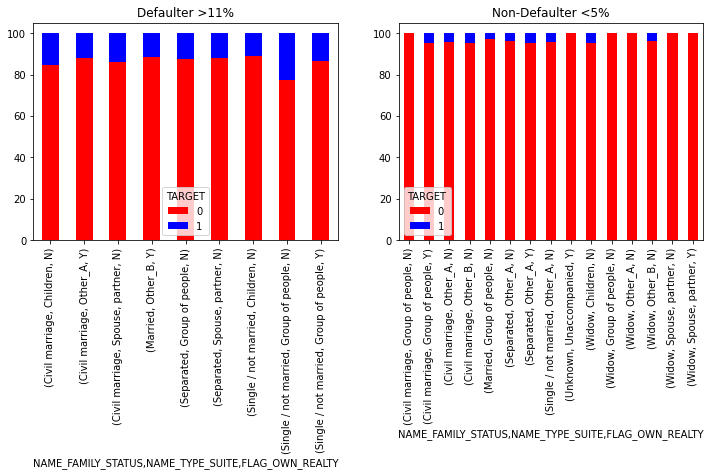

In [125]:
group_3=(pd.crosstab(index= [bank_cleaned_new['NAME_FAMILY_STATUS'], bank_cleaned_new['NAME_TYPE_SUITE'],
                               bank_cleaned_new['FLAG_OWN_REALTY']],
                       columns= bank_cleaned_new['TARGET'], 
                       values= bank_cleaned_new['TARGET'], 
                       aggfunc ='count' ,
                       margins=True,margins_name='Total',
                       normalize= 'index')*100).round(1)

fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2,figsize=(12,4))
group_3[group_3[1]>11].plot(ax=ax1,kind='bar',mark_right = True, stacked=True, color=['red','blue'], grid=False,title='Defaulter >11%')
group_3[group_3[1]<5].plot(ax=ax2,kind='bar',mark_right = True, stacked=True, color=['red','blue'], grid=False,title='Non-Defaulter <5%');


In [126]:
group_3[group_3[1]>11].reset_index()

TARGET    NAME_FAMILY_STATUS  NAME_TYPE_SUITE FLAG_OWN_REALTY     0     1
0             Civil marriage         Children               N  84.5  15.5
1             Civil marriage          Other_A               Y  88.0  12.0
2             Civil marriage  Spouse, partner               N  86.3  13.7
3                    Married          Other_B               Y  88.4  11.6
4                  Separated  Group of people               N  87.5  12.5
5                  Separated  Spouse, partner               N  88.0  12.0
6       Single / not married         Children               N  88.9  11.1
7       Single / not married  Group of people               N  77.3  22.7
8       Single / not married  Group of people               Y  86.4  13.6

 <p style=color:black>**Look these grouping in conjuction of the count plot. So if we combine the percentage as well as number things will be more clear

 <p style=color:black> ## Note so the grouping information is endless we can create many more but looking for the data these are quite sufficient 

 <p style=color:black>!! So we can do more grouping but one thing to be notice here that group of people single/not married does not have house or apartment are 22.7 percent in defaulter categeory. Since we have grouped many categeory together so it may possible that though their percentage is high but they may be less in th number. So use these insight with the countplot which we have plotted above. for example lets check the number of above group.

In [127]:
#checking number of the people in that group
bank_cleaned_new[(bank_cleaned_new['NAME_FAMILY_STATUS']=='Single / not married') & (bank_cleaned_new['NAME_TYPE_SUITE']=='Group of people')].shape

(44, 35)

 <p style=color:black>so their percentage is high but they are only 45 in numbers so that too keep in the mind.

 <h1 style=color:black> 10-PREVIOUS APPLICATION

In [128]:
#Loading previous application data and head()
prev_app=pd.read_csv('previous_application.csv')
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  ...       PRODUCT_COMBINATION  \
0     17145.0               0.0  ...  POS mobile with interest   
1    679671.0               NaN  ...          Cash X-Sell: low   
2    136444.5               NaN  ...         Cash X-Sell: high   
3    470790.0               NaN  ...       Cash X-Sell: middle   
4    404055.0               NaN  ...         Cash Street: high   

  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
0           365243.0           -42.0                     300.0          -42.0   
1           365243.0          -134.0                     916.0       365243.0   
2           365243.0          -271.0                      59.0       365243.0   
3           365243.0          -482.0                    -152.0         -182.0   
4                NaN             NaN                       NaN            NaN   

   DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
0             -37.0                        0.0  
1          365243.0                        1.0  
2          365243.0                        1.0  
3            -177.0                        1.0  
4               NaN                        NaN  

[5 rows x 37 columns]

In [129]:
#shape of the data
prev_app.shape

(1670214, 37)

In [130]:
#data info of the object column
prev_app.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 16 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   NAME_CONTRACT_TYPE           1670214 non-null  object
 1   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object
 2   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object
 3   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object
 4   NAME_CONTRACT_STATUS         1670214 non-null  object
 5   NAME_PAYMENT_TYPE            1670214 non-null  object
 6   CODE_REJECT_REASON           1670214 non-null  object
 7   NAME_TYPE_SUITE              849809 non-null   object
 8   NAME_CLIENT_TYPE             1670214 non-null  object
 9   NAME_GOODS_CATEGORY          1670214 non-null  object
 10  NAME_PORTFOLIO               1670214 non-null  object
 11  NAME_PRODUCT_TYPE            1670214 non-null  object
 12  CHANNEL_TYPE                 1670214 non-null  object
 1

In [131]:
#checking the duplicate value
prev_app.duplicated().sum()

0

In [132]:
#Checking missing value
missing_value=pd.DataFrame(prev_app.isnull().mean()*100).sort_values(by=0,ascending=False)

In [133]:
#Missing value column greater than 20 percent
drop_cols=missing_value[missing_value[0]>20]

In [134]:
drop_cols

0
RATE_INTEREST_PRIVILEGED   99.643698
RATE_INTEREST_PRIMARY      99.643698
AMT_DOWN_PAYMENT           53.636480
RATE_DOWN_PAYMENT          53.636480
NAME_TYPE_SUITE            49.119754
NFLAG_INSURED_ON_APPROVAL  40.298129
DAYS_TERMINATION           40.298129
DAYS_LAST_DUE              40.298129
DAYS_LAST_DUE_1ST_VERSION  40.298129
DAYS_FIRST_DUE             40.298129
DAYS_FIRST_DRAWING         40.298129
AMT_GOODS_PRICE            23.081773
AMT_ANNUITY                22.286665
CNT_PAYMENT                22.286366

In [135]:
#list of dropping columns
drop_cols.index

Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL',
       'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_PAYMENT'],
      dtype='object')

In [136]:
#dropping columns from the data
prev_app.drop(drop_cols.index,axis=1,inplace=True)

In [137]:
#mode value of the product combination
mode_prod=prev_app['PRODUCT_COMBINATION'].mode()[0]

In [138]:
#fill na with mode of the product column
prev_app['PRODUCT_COMBINATION'].fillna(mode_prod,inplace=True)

In [139]:
#median value of the at_credit
median_credit=int(prev_app['AMT_CREDIT'].median())

In [140]:
# Fill Na with the median value
prev_app['AMT_CREDIT'].fillna(median_credit,inplace=True)

In [141]:
#checking null value now
prev_app.isnull().sum().sum()

0

In [142]:
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ... NAME_PORTFOLIO  \
0                   SATURDAY                       15  ...            POS   
1                   THURSDAY                       11  ...           Cash   
2                    TUESDAY                       11  ...           Cash   
3                     MONDAY                        7  ...           Cash   
4                   THURSDAY                        9  ...           Cash   

   NAME_PRODUCT_TYPE             CHANNEL_TYPE SELLERPLACE_AREA  \
0                XNA             Country-wide               35   
1             x-sell           Contact center               -1   
2             x-sell  Credit and cash offices               -1   
3             x-sell  Credit and cash offices               -1   
4            walk-in  Credit and cash offices               -1   

   NAME_SELLER_INDUSTRY NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0          Connectivity           middle  POS mobile with interest  
1                   XNA       low_action          Cash X-Sell: low  
2                   XNA             high         Cash X-Sell: high  
3                   XNA           middle       Cash X-Sell: middle  
4                   XNA             high         Cash Street: high  

[5 rows x 23 columns]

In [143]:
#column in the data
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [144]:
#selecting column which we are not going to use
drop_unwanted_cols=['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                     'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
                     'NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE','NAME_GOODS_CATEGORY',
                     'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE','CHANNEL_TYPE', 
                     'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP']

In [145]:
#Dropping above selected column
prev_app.drop(drop_unwanted_cols,axis=1,inplace=True)

In [146]:
#shape of the data
prev_app.shape

(1670214, 10)

In [147]:
# creating object column for iteration
object_col=prev_app.select_dtypes(include='object').columns

In [148]:
for i in object_col:
    print(i)
    print(prev_app[i].value_counts())
    print('*'*50)

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
**************************************************
NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64
**************************************************
CODE_REJECT_REASON
XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64
**************************************************
NAME_CLIENT_TYPE
Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64
**************************************************
PRODUCT_COMBINATION
Cash                             286336
POS household with interest      263622
POS mobile with in

In [149]:
#replacing XNA and XAP to NAN
prev_app=prev_app.replace('XNA', np.NaN)
prev_app=prev_app.replace('XAP', np.NaN)

In [150]:
#Value count 
for i in object_col:
    print(i)
    print(prev_app[i].value_counts(dropna=False))
    print('*'*50)

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
NaN                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
**************************************************
NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64
**************************************************
CODE_REJECT_REASON
NaN       1358337
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64
**************************************************
NAME_CLIENT_TYPE
Repeater     1231261
New           301363
Refreshed     135649
NaN             1941
Name: NAME_CLIENT_TYPE, dtype: int64
**************************************************
PRODUCT_COMBINATION
Cash                             286336
POS household with interest      263622
POS mobile with interest         220

In [151]:
#data head of the previous applcation
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  NAME_CONTRACT_STATUS  DAYS_DECISION CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0             Approved            -73                NaN         Repeater   
1             Approved           -164                NaN         Repeater   
2             Approved           -301                NaN         Repeater   
3             Approved           -512                NaN         Repeater   
4              Refused           -781                 HC         Repeater   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

In [152]:
# Days columns -ve value to abs value
prev_app['DAYS_DECISION']=prev_app['DAYS_DECISION'].apply(lambda x: abs(x))

In [153]:
#checking info of the previous application dataset.
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_PREV            1670214 non-null  int64  
 1   SK_ID_CURR            1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE    1669868 non-null  object 
 3   AMT_APPLICATION       1670214 non-null  float64
 4   AMT_CREDIT            1670214 non-null  float64
 5   NAME_CONTRACT_STATUS  1670214 non-null  object 
 6   DAYS_DECISION         1670214 non-null  int64  
 7   CODE_REJECT_REASON    311877 non-null   object 
 8   NAME_CLIENT_TYPE      1668273 non-null  object 
 9   PRODUCT_COMBINATION   1670214 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 127.4+ MB


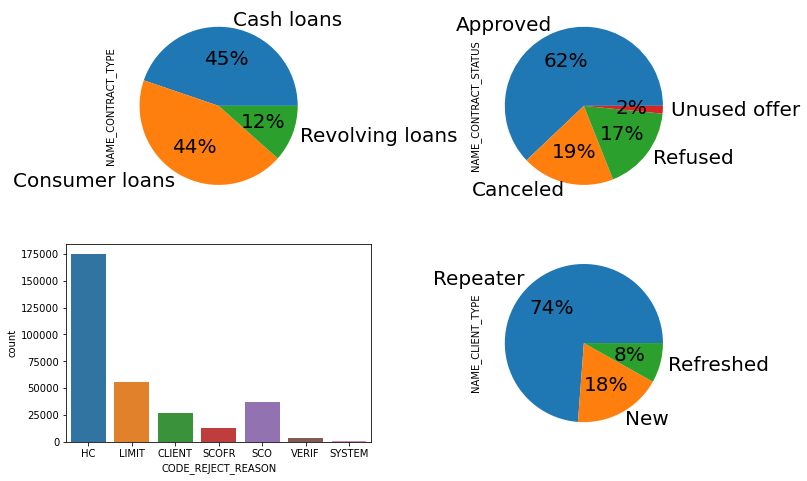

In [154]:

f,ax=plt.subplots(2,2,figsize=(12,8))
prev_app['NAME_CONTRACT_TYPE'].value_counts().plot(kind='pie',ax=ax[0,0],autopct='%.0f%%',fontsize=20)
prev_app['NAME_CONTRACT_STATUS'].value_counts().plot(kind='pie',ax=ax[0,1],autopct='%.0f%%',fontsize=20)
sns.countplot('CODE_REJECT_REASON',data=prev_app,ax=ax[1,0]) #pie chat not appropriate for this
prev_app['NAME_CLIENT_TYPE'].value_counts().plot(kind='pie',ax=ax[1,1],autopct='%.0f%%',fontsize=20);



<p style=color:black>1.Consumer and Cash loans are almost same and high in number but revolving loans are very few.             
<p style=color:black>2.Very few loans are the unused, mostly the loans are approved and higest in number, Refused and cancelled are almost same in number.
<p style=color:black>3.The reason 'High Credit'(HC) is highest for previous application rejection. Second highest reason for rejection is Limit.                        
<p style=color:black>4.Most of applications are repeaters. 

 <h1 style=color:black> 11-Combined dataset

In [155]:
#Merging both the dataset inner join on SK_ID_CURR
combined = pd.merge(left=bank_cleaned_new,right=prev_app,how='inner',on='SK_ID_CURR')

In [156]:
#combined data head
combined.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  ...  AMT_APPLICATION  AMT_CREDIT_y  \
0               Y             0  ...         179055.0      179055.0   
1               N             0  ...         900000.0     1035882.0   
2               N             0  ...         337500.0      348637.5   
3               N             0  ...          68809.5       68053.5   
4               Y             0  ...          24282.0       20106.0   

   NAME_CONTRACT_STATUS  DAYS_DECISION CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0              Approved            606                NaN              New   
1              Approved            746                NaN         Repeater   
2              Approved            828                NaN        Refreshed   
3              Approved           2341                NaN        Refreshed   
4              Approved            815                NaN              New   

           PRODUCT_COMBINATION  
0      POS other with interest  
1             Cash X-Sell: low  
2   POS industry with interest  
3  POS household with interest  
4  POS mobile without interest  

[5 rows x 44 columns]

In [157]:
#Percentage of null value in combined dataset
combined.isnull().mean()*100

SK_ID_CURR               0.000000
TARGET                   0.000000
NAME_CONTRACT_TYPE_x     0.000000
CODE_GENDER              0.000000
FLAG_OWN_CAR             0.000000
                          ...    
NAME_CONTRACT_STATUS     0.000000
DAYS_DECISION            0.000000
CODE_REJECT_REASON      81.292545
NAME_CLIENT_TYPE         0.109690
PRODUCT_COMBINATION      0.000000
Length: 44, dtype: float64

 <p style=color:black> We have too many missing value in the Code reject reson 81.3% but we will not drop this column we will analysis whatever data is available. also for two other column we will keep nan value same as it is

In [158]:
combined.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'FLOORSMAX_MEDI',
       'EMERGENCYSTATE_MODE', 'YEAR_BIRTH', 'YEAR_EMPLOYED',
       'YEAR_REGISTRATION', 'YEAR_ID_PUBLISH', 'YEAR_LAST_PHONE_CHANGE',
       'Flag_doc_total', 'Commun_Total', 'Total_add_match', 'CODE_GENDER_NUM',
       'TOTALINCOME_BIN', 'BIRTH_BIN', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_APPLICATION', 'AMT_CREDIT_y', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [159]:
unwanted_cols=['FLAG_OWN_REALTY', 'CNT_CHILDREN','AMT_GOODS_PRICE','NAME_TYPE_SUITE',
               'NAME_INCOME_TYPE','AMT_CREDIT_x','AMT_ANNUITY','AMT_CREDIT_y',
               'EMERGENCYSTATE_MODE','YEAR_BIRTH','NAME_EDUCATION_TYPE',
               'REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
               'FLOORSMAX_MEDI','YEAR_EMPLOYED','YEAR_REGISTRATION', 'YEAR_ID_PUBLISH', 
               'YEAR_LAST_PHONE_CHANGE','Flag_doc_total', 'Commun_Total', 'Total_add_match',
               'CODE_GENDER_NUM','AMT_APPLICATION','DAYS_DECISION']

 <p style=color:sea> Dropping few features 

In [160]:
#dropping unwanted column from the combined dataset
combined.drop(unwanted_cols,axis=1,inplace=True)

In [161]:
#checking shape of combined after dropping column
combined.shape 

(1386629, 19)

 <p style=color:black> Now combined dataset have 1386629 row and 18 column

In [162]:
# collumns in the dataset
combined.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'AMT_INCOME_TOTAL', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'ORGANIZATION_TYPE', 'TOTALINCOME_BIN', 'BIRTH_BIN', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'PRODUCT_COMBINATION'],
      dtype='object')

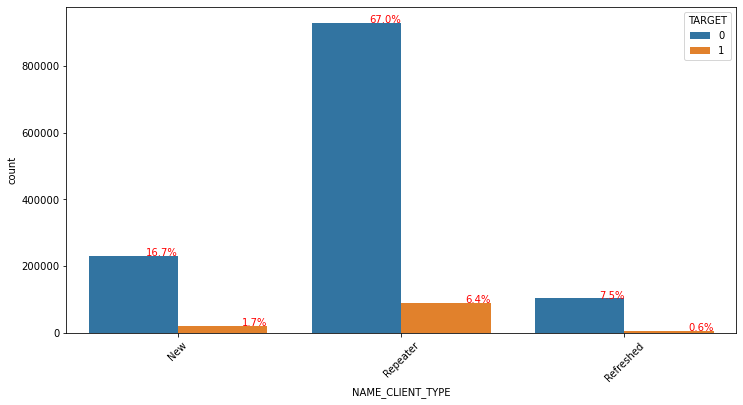

In [163]:
# Plotting NAME_CLIENT_TYPE hue as TARGET using percentage on graph
plt.figure(figsize=(12,6))
# plt.yscale('log') 
plt.xticks(rotation=45)
ax=sns.countplot(data =combined, x= 'NAME_CLIENT_TYPE',hue='TARGET')
total = float(len(combined))
for p in ax.patches:  # code below this for represting percentage
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right',color='red')
plt.show(); 

 <p style=color:black>## Repeater are highest in number and if we see defaulter vs non defaulter then there is hardly much difference but still we can say Refreshed is little comparatively better but we will segregate data and view some in-depth analysis.

In [164]:
# Collecting repeater from conbimed dataset.
combined_repeater=combined[combined['NAME_CLIENT_TYPE']=='Repeater']

In [165]:
#Creating funtion to see all other type of graph
def client_graph(data,col1,dataname='Repeater'):
    plt.figure(figsize=(12,6))
    ax=sns.countplot(data =data, x= col1,hue='TARGET')
    # plt.yscale('log') # for checking the graph in logarithm scale
    plt.title(f'{col1} in {dataname}',color='red',fontsize=20)
    plt.xticks(rotation=90)
    total = float(len(data))
    for p in ax.patches:  # code below this for represting percentage
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='right',color='red')
    plt.show();

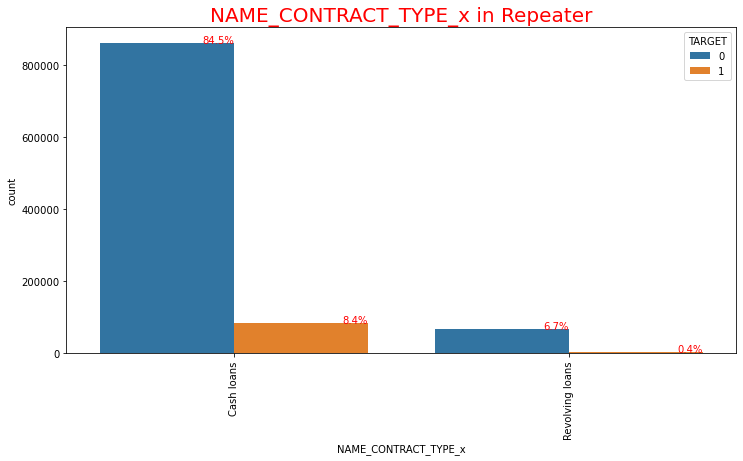

In [166]:
# Repeater data Name contract type hue as target
client_graph(combined_repeater,'NAME_CONTRACT_TYPE_x')

 <p style=color:black> Though revolving loans are very low but we can see that non defaulter are also very less in these type of loans

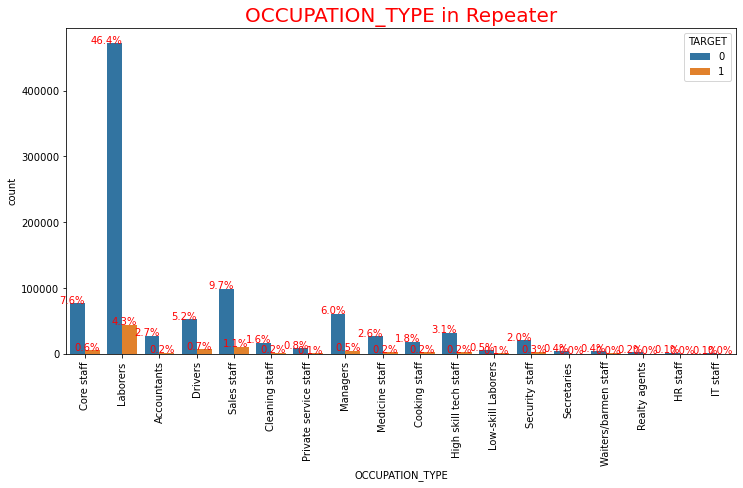

In [167]:
#Repeater data Occupation type hue as target
client_graph(combined_repeater,'OCCUPATION_TYPE')

 <p style=color:black> We can see managers are good in paying loans

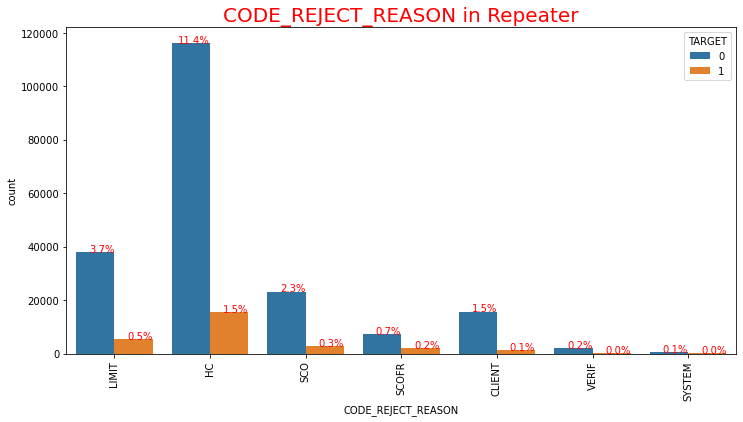

In [168]:
#Repeater data Code rejection with ue as target
client_graph(combined_repeater,'CODE_REJECT_REASON')


 <p style=color:black>**We can see the most of the reason for the rejection of the code is higher credit limit(HC).But remember we have many nan value in this column, we can actually see only 25 percent data, so rest 75 pecent is nan.

 <p style=color:black>Creating new dataset where NAME_CLIENT_TYPE is NEW

In [169]:
#creating new dataset where NAME_CLIENT_TYPE is NEW
combined_new=combined[combined['NAME_CLIENT_TYPE']=='New']


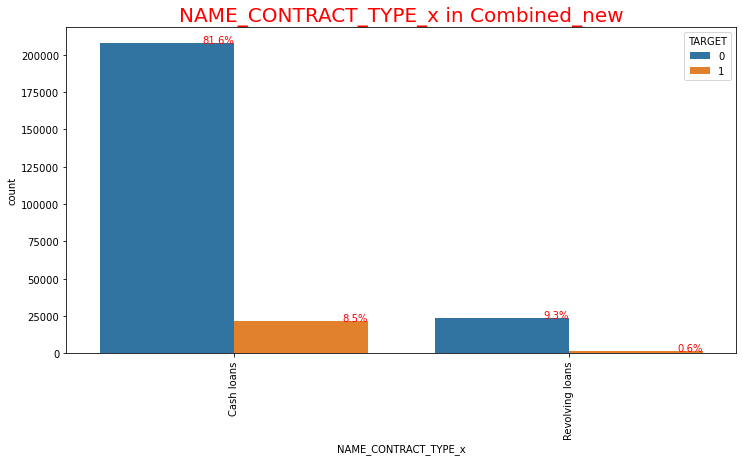

In [170]:
#NAME_CONTRACT_TYPE_x in combined_new extracted from combined
client_graph(combined_new,'NAME_CONTRACT_TYPE_x',dataname='Combined_new')

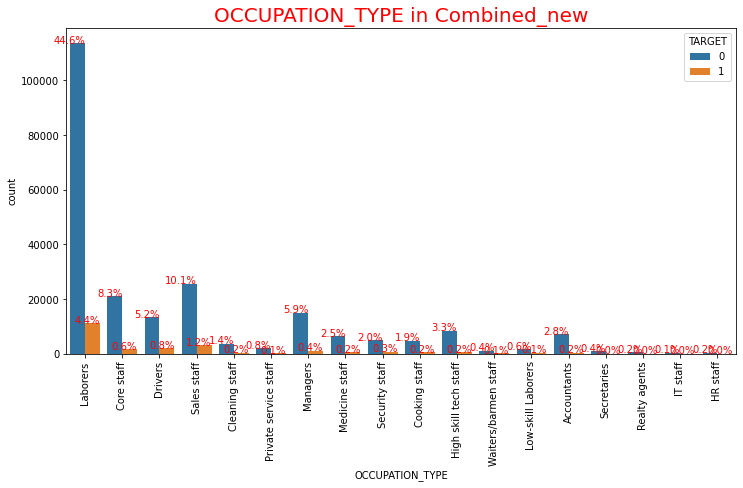

In [171]:
#OCCUPATION_TYPE in new extracted from combined
client_graph(combined_new,'OCCUPATION_TYPE',dataname='Combined_new')

<p style=color:black>** Total Laborers 49%,Corestaff 8.9% ,sales staff 11.3 and managers 6.3% also NON-DEfaulter laborers 91%, corestaff 93.2%, Salesstaff- 89.3% and managers 93.6%. So again managers are better and salestaff is poor in paying loans.

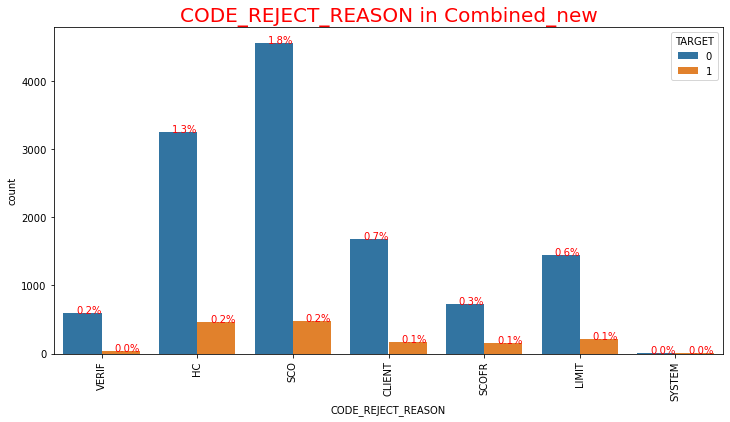

In [172]:
#Code rejection  in new extracted from combined
client_graph(combined_new,'CODE_REJECT_REASON',dataname='Combined_new')

 <p style=color:black>**We can see here only 6 percent data is available for the code reject reason so rest will be nan value. we can check it with the value count method

In [173]:
#Code rejection value count in new extracted from combine
combined_new['CODE_REJECT_REASON'].value_counts(normalize=True,dropna=False)*100

NaN       94.605856
SCO        1.973467
HC         1.453100
CLIENT     0.723801
LIMIT      0.651146
SCOFR      0.343639
VERIF      0.245849
SYSTEM     0.003142
Name: CODE_REJECT_REASON, dtype: float64

##### <p style=color:black> Now we will check product combination on basis of hue as Name_contract_status

<AxesSubplot:xlabel='count', ylabel='PRODUCT_COMBINATION'>

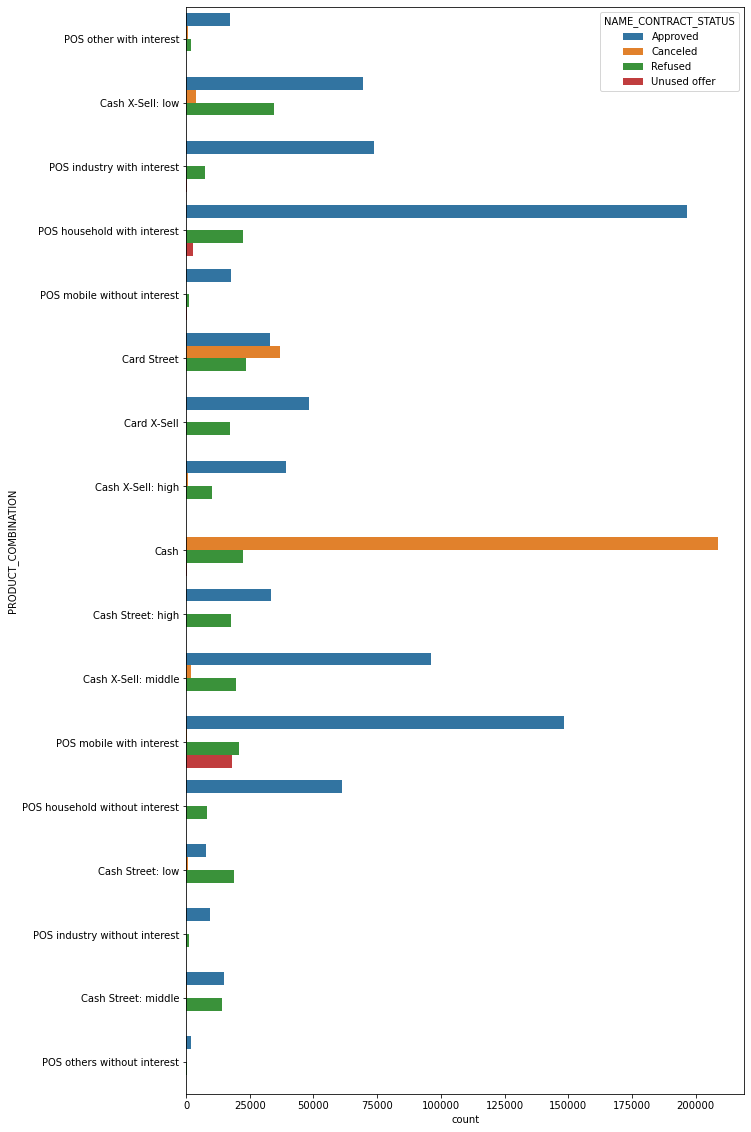

In [174]:
plt.figure(figsize=(10,20))
# plt.xscale('log') # for checking figure in log scale
sns.countplot(y=combined.PRODUCT_COMBINATION,hue=combined.NAME_CONTRACT_STATUS)

<p style=color:black>Observation full  combined dataset**

<p style=color:black>#Highest loans are approved for house hold interest**

<p style=color:black>#Higest cancelled are due to cash, highest refused are cash X sell, Highest unused is Pos with mobile interest**

<AxesSubplot:>

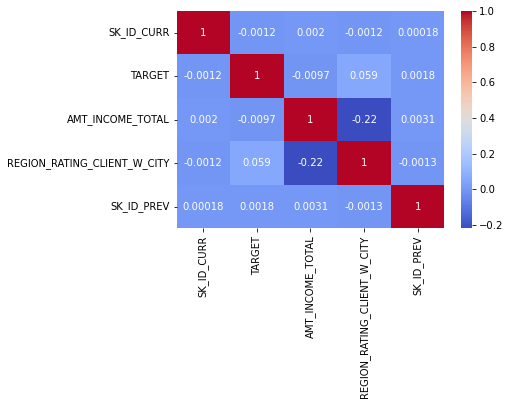

In [175]:
#Plotting heatmap to see corelation in numerical column in combined dataset.
sns.heatmap(combined.corr(),annot=True,cmap='coolwarm')


<p style=color:black>We can not see any strong corelation , but there is very small negative co relation between the Region_rating_W_city and Ant_income_total**

#  <p style=color:black>Final Conclussion

**1.Data cleaning and feature selection are the most important part before we proceed for preparing data for analysis.**

**2.As individual following are the highest applying for the loan**

<p style=color:blue>👉👉Cash loan is in high demand compare to the revolving loan                               
<p style=color:blue>👉👉In the application data number of females are more than the numebr of male.                        
<p style=color:blue>👉👉Most of the people applying for the loan does not own the car.                         
<p style=color:blue>👉👉Most of the poeple has their own house applying for the loan.                          
<p style=color:blue>👉👉A large number of people coming unaccompanied and after that second highest  with the family.                                                                              
<p style=color:blue>👉👉Most of the working people applying for the loans.                                     
<p style=color:blue>👉👉Secondary Education and Higher Education applying are the large number applying for the loans.                                                                                   
<p style=color:blue>👉👉People applying for the loans mostly are married.                                      
<p style=color:blue>👉👉Labourers and Business entity are the higest appying for the loan.**

**3.Outliers are present in following column 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'**

**4.Converting all the features in four part will help a lot when conducting univariate,bivariate and mulivariate analysis**

**5.From histogram we can see most of the data columns are right skewed**

**6.Males are more defaulter compare to the female vice versa we can say that females are good customers**

**7.Data is highly imbalaced 92% for non defaulter  and only 8% for the defaulter. So we can only help the bank if we find the categeory that have high percentage of the defaulter as bad customer and high percentage of the non defaulter as good customer these percentage should be higher than these data percentage.In simple word we can say that fight is between 92% vs 8%**

**8.From the percentage comparision we can conclude the following**

<p style=color:blue>👉👉 Name Education Type-  Seconday/special education and Higher Education are contributing almost 94% of the completed data. In Seconday/special 0-65.2% and 1-6.5 and in Higher Education 0-22.4% and 1-1.3, so we can say that Higher education is more reliable because Non_defaulters are 94.5 percent and defualter 5.7percent. 

<p style=color:blue>👉👉 Total_income_bin-  Those who are having VH income and M(Medium) income are applying for the loan almost half of the other income type. Also people in the bin of high income are more reliable comparing to others.

<p style=color:blue>👉👉 Birth_bin-  We can see from the graph that People in age bin of 50-60 are more relieable. Also people in bin 20-30 and 30-40 has higest numer of defaulter compare to other.

<p style=color:blue>👉👉 Name_contract_type-  Though we can see that 90% of the people applying for the cash loans and only 10% are in the revolving loan and we compare both number of defauter are less in the revolving loan comparing to the Cash loan.

<p style=color:blue>👉👉 Code gender- In application males are 34% and Females are 66%. Also we can see Male defaulter 10.3% and Non-defaulter 89.7%. For female defaulter 7.1% and non-Defaulter is 92.9%. So Female are good customer in terms of paying loans and also good in number for applying loans.

<p style=color:blue>👉👉 Flag_own_car- We can see  those who are having the car applying for the loan more than the people having the car. There is very little difference but we can say people having car are more reliable than who does not own the car.

<p style=color:blue>👉👉 Flag_own_reality- Those who have their own house are compratively twice the people not having their own house and appatment but if we talk about the target0 and target 1 both are equal. So for business purpose bank should focus on the people who has their own house as these are higher Customers.

<p style=color:blue>👉👉 Name_Suite_type- Unaccompanied people are highest almost 80% of the total and family are the second highest percentage wise both have same number of the defaulter. 

<p style=color:blue>👉👉 Name_Income_Type- Working (total-52%), commercial(Total-23%) and Pensionner( 18%) these 3 are higher in number and number of defaulter are very less in Commercials and in Penssionner compare to the Working. Pensionners have 94.5% Non-defaulter and only 5.5% of the defaulter.
    
<p style=color:blue>👉👉 Name_Family_status- Total Married(63.5%),Single/Not Married(15%),Civil marriage(9.8%), Seprated(6.4%) and Widow(5.3%). If we check for defaulter then Civil marriage and single/not married have highest number of defaulter about 10% . Widow has very less number of defaulter only 5.66%  

<p style=color:blue>👉👉 OCCUPATION_TYPE- Labourers, core staff, managers and Sales staff is four highest categeory Labourers are the highest applicants almost 50% of the total. Numbers of defaulter are highest in Sales Staff on comparing these four. Also core staff and managers have very less number of defaulter. 
    
<p style=color:BLUE>👉👉 ORGANIZATION_TYPE-Business Entity 3 and Self employed are highest in demanding loan. For defaulter and no defaulter check point no.13.

**9.HEATMAP**

 <p style=color:blue>👉👉DISCRETE FEATURES-we can see cnt_childern and cnt_family member has strong co relation and region rating client and region rating client w city and strong co relation.

<p style=color:blue>👉👉CONTINIOUS FEATURES-WE can see two patches one at the left hand upper corner and one at the right hand lower corner. 
these both have 4 columns and have have strong corelation amongs themselves. 1st patch has 4 column namely-'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE' and other group have YEAR_BIRTH', 'YEAR_EMPLOYED', 'YEAR_REGISTRATION', 'YEAR_ID_PUBLISH','YEAR_LAST_PHONE_CHANGE'.**

**10.Observation for Non-defaulter using box plot**

<p style=color:blue>👉👉 Family having the academic degree have higher income compare to other. Also we can see in academic degree those who did civil marriage have higher income amongs all. 
<p style=color:blue>👉👉 Income range of the lower secondary is very low comparing to all.

**11.Observation for defaulter using box plot**

<p style=color:blue>👉👉 Income range is low of all the defaulter compare to the non defaulter

<p style=color:blue>👉👉 Income range of widow is less compare to other in same education type.

<p style=color:blue>👉👉 Except married people there are no other defaulter present in the graph

**12.Observation- Occupation type**
 <span style="color:blue"> We can see labourers(both male and female), Sales staff(female),Drivers(female) and core staff(Female) are mostly applying for the loans. These categeory are the higest customers for the bank.

<p style=color:blue>😊😊 In occupation_type Accountants and HR staff are the good as being Non-Defaulter

<p style=color:blue>😥😥 In occupation_type cooking staff,Drivers,low skill labourers,security staff and waitress/barmen staff are poor performer for replaying the loan ammount

**13.Observation- Organisation type**

<p style=color:blue> 👍👍 Good customer - Female having higher education and both male and female having academic degree have good record to being as non defaulter
<h5 style=color:blue> 😥😥 Poor customer - Males belongs to Lower secondary education and Secondary/Secondary special are more dafaulter.

**14. When grouping NAME_EDUCATION_TYPE and code_gender together and if see percentage wise then we an conclude following**

<p style=color:blue>👍👍 Good customer - Female having higher education and both male and female having academic degree have good record to being as non defaulter
<p style=color:blue>😥😥 Poor customer - Males belongs to Lower secondary education and Secondary/Secondary special are more dafaulter.

**15.When grouping Occupation and code gender we can conclude following**

<p style=color:blue>😊😊 Good customer - Acoountants(F),HR,staff(male) and Managers(female) less than 6 percent  being as defaulter

<p style=color:blue>😥😥Poor customers-Reality state male and low skilled labour both male and female are very very poor performance(>15%) for repaying the loans also
drivers(male), cooking staff (male),Secretaries(male),Security staff(male), waiters/barmen staff(female) these are more than 11 percent defaulter.


**16.We can create multiple group taking  2 or more than 2 features and analyse either the person falls in the defaulter categeory or in the non defaulter categeory.This will give you higher percentage also count can be less but give you more clear picture, Like above when we created group of 3 we can see that percentage we got 22.7 and count is 45.**

**17. In previous application after cleaning data we can see the few insight as below**

<p style=color:blue>👉👉Consumer and Cash loans are almost same and high in number but revolving loans are very few.                                                                                                            
<p style=color:blue>👉👉Very few loans are the unused, mostly the loans are approved and higest in number, Refused and cancelled are almost same in number.

<p style=color:blue>👉👉The reason 'High Credit'(HC) is highest for previous application rejection. Second highest reason for rejection is Limit.  

<p style=color:blue>👉👉Most of applications are repeaters. 

**18.When combining the both the dataset we can observe following**<p style=color:blue>👉👉Total percentage in New are 18.4%, Repeaters are 73.5% and Refreshed are 8.1%. There is hardly any diffrence but still on Comparing we can see there are less number of defaulter in refreshed.

**19.When observing the repeaters in combined dataset we can observe following**

<p style=color:blue>👉👉Name_contract_status- We can see total cash loans are -92.9% and Revolving loans are only 7.1%. But comparing these two we can see that number of defaulters are very less in the Revolving loans 

<p style=color:blue>👉👉Occupation_type- Total numbers in occupation type Labourers(50.7%),SalesStaff(10.8%),corestaff(8.2%),Managers(6.5%),drivers(5.7%) and Accountants(2.9%).Out of these SalesStaff have higest number of defaulter.

<p style=color:blue>👉👉Code_rejection_region- Most of the reason for code rejection is High credit (HC)

**20.When observing the NEW in combined dataset .And rejection reason  is high due to the score(SCO)**

<p style=color:blue>👉👉Contract_type- we can observe Total Laborers 49%,Corestaff 8.9% ,sales staff 11.3 and managers 6.3% also NON-DEfaulter laborers 91%, corestaff 93.2%, Salesstaff- 89.3% and managers 93.6%. So again managers are better and salestaff is poor in paying loans

**21.In the heatmap we can see There is no strong co relation exists either negative or positive.**